### Capstone Project: Part 4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import naive_bayes
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

from sklearn.preprocessing import label_binarize

import warnings
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from ipywidgets import *
from IPython.display import display
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(9, 7))
sns.set(font_scale=1.5)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.simplefilter('ignore')

In [2]:
def plot_f1_lines(figsize=(8, 6), fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)

    # add lines of constant F1 scores

    for const in np.linspace(0.2, 0.9, 8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                    xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

In [3]:
df = pd.read_csv('/Users/darshanasridhar/Documents/Ga Capstone Datasets /Recidivism/recidivism_clean.csv')
df

Year Released  Tracking End  Average Release Age  Recidivism Type  \
0               2010          2013                 29.5                2   
1               2010          2013                 29.5                1   
2               2010          2013                 39.5                1   
3               2010          2013                 29.5                0   
4               2010          2013                 39.5                1   
...              ...           ...                  ...              ...   
26012           2015          2018                 25.0                0   
26013           2015          2018                 39.5                0   
26014           2015          2018                 29.5                0   
26015           2015          2018                 29.5                0   
26016           2015          2018                 39.5                1   

       District_2JD  District_3JD  District_4JD  District_5JD  District_6JD  \
0                 0             0             0             0             0   
1                 0             0             0             0             0   
2                 0             0             0             1             0   
3                 0             0             0             0             1   
4                 0             0             0             0             0   
...             ...           ...           ...           ...           ...   
26012             0             0             0             0             0   
26013             0             0             0             0             1   
26014             0             0             0             1             0   
26015             0             0             0             1             0   
26016             0             0             0             0             0   

       District_7JD  ...  Offense Subtype_Robbery  Offense Subtype_Sex  \
0                 1  ...                        1                    0   
1                 0  ...                        0                    0   
2                 0  ...                        0                    0   
3                 0  ...                        0                    0   
4                 0  ...                        0                    0   
...             ...  ...                      ...                  ...   
26012             0  ...                        0                    0   
26013             0  ...                        0                    1   
26014             0  ...                        0                    0   
26015             0  ...                        0                    0   
26016             0  ...                        0                    0   

       Offense Subtype_Sex Offender Registry/Residency  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
26012                                                0   
26013                                                0   
26014                                                0   
26015                                                0   
26016                                                0   

       Offense Subtype_Special Sentence Revocation  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
26012                                            0   
26013                                            0   
26014                                            0   
26015              

In [4]:
df_copy = df.copy()
X = df_copy.drop('Recidivism Type', axis=1)

In [5]:
X

Year Released  Tracking End  Average Release Age  District_2JD  \
0               2010          2013                 29.5             0   
1               2010          2013                 29.5             0   
2               2010          2013                 39.5             0   
3               2010          2013                 29.5             0   
4               2010          2013                 39.5             0   
...              ...           ...                  ...           ...   
26012           2015          2018                 25.0             0   
26013           2015          2018                 39.5             0   
26014           2015          2018                 29.5             0   
26015           2015          2018                 29.5             0   
26016           2015          2018                 39.5             0   

       District_3JD  District_4JD  District_5JD  District_6JD  District_7JD  \
0                 0             0             0             0             1   
1                 0             0             0             0             0   
2                 0             0             1             0             0   
3                 0             0             0             1             0   
4                 0             0             0             0             0   
...             ...           ...           ...           ...           ...   
26012             0             0             0             0             0   
26013             0             0             0             1             0   
26014             0             0             1             0             0   
26015             0             0             1             0             0   
26016             0             0             0             0             0   

       District_8JD  ...  Offense Subtype_Robbery  Offense Subtype_Sex  \
0                 0  ...                        1                    0   
1                 0  ...                        0                    0   
2                 0  ...                        0                    0   
3                 0  ...                        0                    0   
4                 0  ...                        0                    0   
...             ...  ...                      ...                  ...   
26012             0  ...                        0                    0   
26013             0  ...                        0                    1   
26014             0  ...                        0                    0   
26015             0  ...                        0                    0   
26016             0  ...                        0                    0   

       Offense Subtype_Sex Offender Registry/Residency  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
26012                                                0   
26013                                                0   
26014                                                0   
26015                                                0   
26016                                                0   

       Offense Subtype_Special Sentence Revocation  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
26012                                            0   
26013                                            0   
26014                                            0   
26015                                            0   
2

In [6]:
X.columns

Index(['Year Released', 'Tracking End', 'Average Release Age', 'District_2JD',
       'District_3JD', 'District_4JD', 'District_5JD', 'District_6JD',
       'District_7JD', 'District_8JD', 'District_ISC',
       'District_Interstate Compact', 'District_None Given',
       'Release Type_None Given', 'Release Type_Parole',
       'Release Type_Special Sentence', 'Ethnicity_Non-Hispanic',
       'Ethnicity_None Given', 'Race_Asian or Pacific Islander', 'Race_Black',
       'Race_None Given', 'Race_White', 'Sex_Male', 'Offense Classification_2',
       'Offense Classification_3', 'Offense Classification_4',
       'Offense Classification_5', 'Offense Classification_6',
       'Offense Classification_7', 'Offense Classification_8',
       'Offense Type_Other', 'Offense Type_Property',
       'Offense Type_Public Order', 'Offense Type_Violent',
       'Offense Subtype_Animals', 'Offense Subtype_Arson',
       'Offense Subtype_Assault', 'Offense Subtype_Burglary',
       'Offense Subtype_Drug

In [7]:
y = df.pop('Recidivism Type')

In [8]:
y

0        2
1        1
2        1
3        0
4        1
        ..
26012    0
26013    0
26014    0
26015    0
26016    1
Name: Recidivism Type, Length: 26017, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(20813, 59) (20813,)
(5204, 59) (5204,)


In [10]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [11]:
#Baseline
y.value_counts(normalize=True)
print('Baseline - Predict Class 0:', y.value_counts(normalize=True).max())

Baseline - Predict Class 0: 0.6663335511396394


In [12]:
print('Baseline:', y.value_counts(normalize=True))

Baseline: 0    0.666334
2    0.212015
1    0.121651
Name: Recidivism Type, dtype: float64


In [13]:
y_train.value_counts(normalize=True)

0    0.666314
2    0.212031
1    0.121655
Name: Recidivism Type, dtype: float64

In [14]:
y_test.value_counts(normalize=True)

0    0.666410
2    0.211952
1    0.121637
Name: Recidivism Type, dtype: float64

In [15]:
#Model 1
model_1 = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=1000) 

model_1.fit(X_train, y_train)

train_predictions_1 = model_1.predict(X_train)
test_predictions_1 = model_1.predict(X_test)
probabilities_1 = model_1.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_1, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_1, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_1, average='micro'))

print('Training score', model_1.score(X_train, y_train))
print('Testing score', model_1.score(X_test, y_test))

cv_scores = cross_val_score(model_1, X_train, y_train, cv=5)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))
print(np.unique(test_predictions_1))

coefficients_1 = model_1.coef_

Precision score 0.6664104534973098
Recall score 0.6664104534973098
F1 score 0.6664104534973098
Training score 0.6684764329986066
Testing score 0.6664104534973098
CV scores [0.67619505 0.66274321 0.66946913 0.6641038  0.66818837]
Mean CV Score 0.6681399131475969
[0 1 2]


In [16]:
print(confusion_matrix(y_test, test_predictions_1, labels=[0, 1, 2]))

[[3399   14   55]
 [ 613   13    7]
 [1037   10   56]]


In [17]:
print(classification_report(y_train, train_predictions_1, digits=4))

              precision    recall  f1-score   support

           0     0.6736    0.9809    0.7987     13868
           1     0.4908    0.0316    0.0594      2532
           2     0.5033    0.0521    0.0945      4413

    accuracy                         0.6685     20813
   macro avg     0.5559    0.3549    0.3175     20813
weighted avg     0.6153    0.6685    0.5595     20813



In [18]:
print(classification_report(y_test, test_predictions_1, digits=4))

              precision    recall  f1-score   support

           0     0.6732    0.9801    0.7982      3468
           1     0.3514    0.0205    0.0388       633
           2     0.4746    0.0508    0.0917      1103

    accuracy                         0.6664      5204
   macro avg     0.4997    0.3505    0.3096      5204
weighted avg     0.5920    0.6664    0.5561      5204



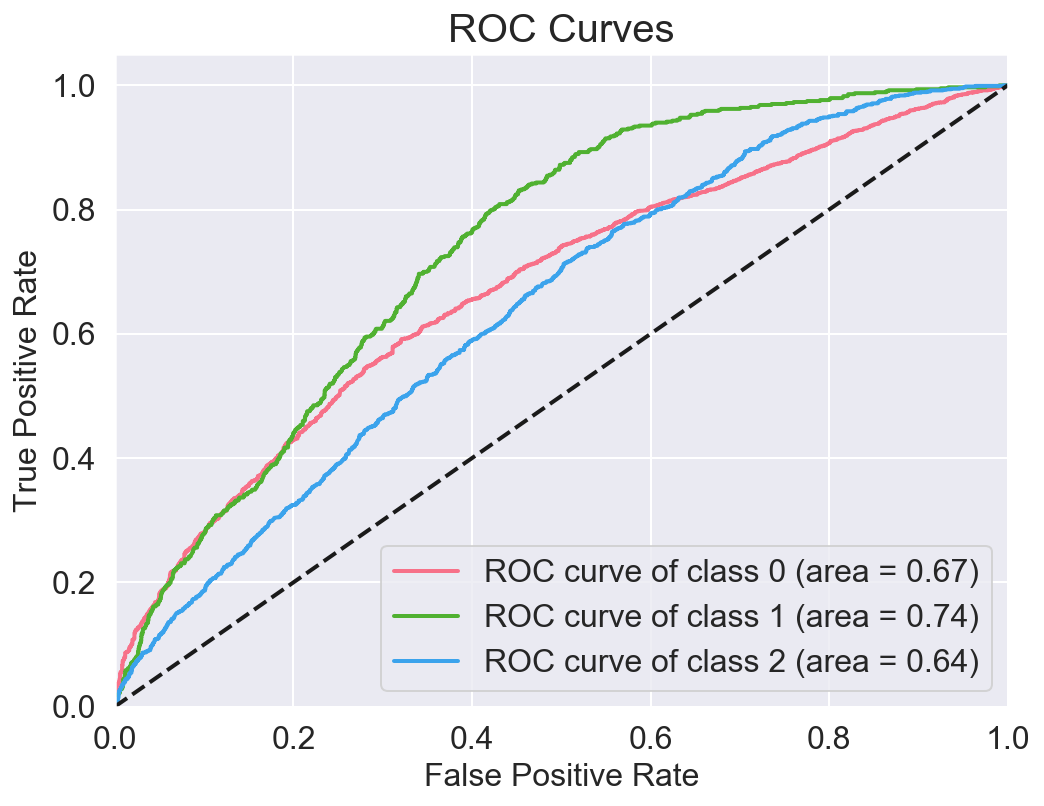

Area under ROC curve (ROC-AUC):
Class 0: 0.67
Class 1: 0.74
Class 2: 0.64


In [19]:
#ROC curve for Model 1
y_test_bin_1 = label_binarize(y_test, model_1.classes_)

skplt.metrics.plot_roc(y_test, model_1.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(model_1.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(
        y_test_bin_1[:, i], model_1.predict_proba(X_test)[:, i]), 2))

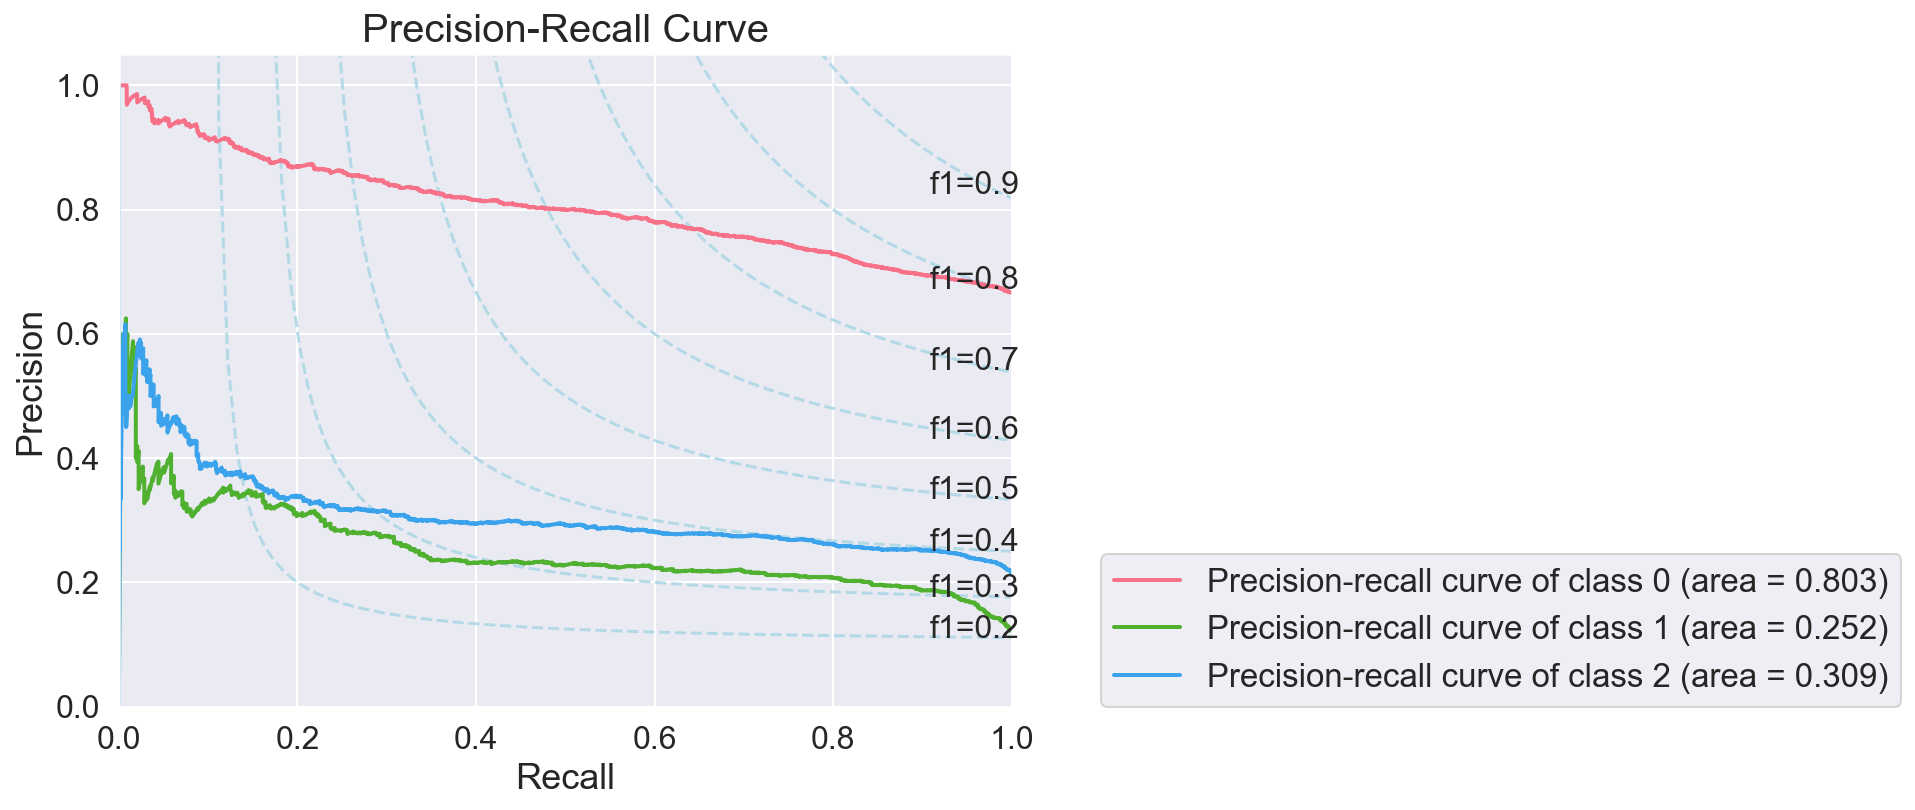

Area under precision-recall curve:
Class 0: 0.8034
Class 1: 0.2518
Class 2: 0.3086


In [20]:
#Precision-Recall curve for Model 1
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, model_1.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

print('Area under precision-recall curve:')
for i, class_ in enumerate(model_1.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(
        y_test_bin_1[:, i], model_1.predict_proba(X_test)[:, i]), 4))

In [21]:
#Model 2
model_2 = LogisticRegressionCV(solver='liblinear',
                               multi_class='ovr', cv=5, max_iter=1000, class_weight='balanced')

model_2.fit(X_train, y_train)

train_predictions_2 = model_2.predict(X_train)
test_predictions_2 = model_2.predict(X_test)
probabilities_2 = model_2.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_2, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_2, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_2, average='micro'))

print('Training score', model_2.score(X_train, y_train))
print('Testing score', model_2.score(X_test, y_test))

cv_scores = cross_val_score(model_2, X_train, y_train, cv=5)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

coefficients_2 = model_2.coef_

Precision score 0.44504227517294387
Recall score 0.44504227517294387
F1 score 0.44504227517294387
Training score 0.4501513477153702
Testing score 0.44504227517294387
CV scores [0.47561854 0.46697093 0.47033389 0.42864008 0.44065353]
Mean CV Score 0.45644339628195246


In [22]:
np.unique(test_predictions_2)

array([0, 1, 2])

In [23]:
print(confusion_matrix(y_test, test_predictions_2, labels=[0, 1, 2]))

[[1640 1553  275]
 [  75  529   29]
 [ 331  625  147]]


In [24]:
print(classification_report(y_train, train_predictions_2, digits=4))

              precision    recall  f1-score   support

           0     0.7996    0.4841    0.6031     13868
           1     0.1931    0.8073    0.3117      2532
           2     0.3337    0.1385    0.1957      4413

    accuracy                         0.4502     20813
   macro avg     0.4421    0.4766    0.3702     20813
weighted avg     0.6270    0.4502    0.4813     20813



In [25]:
print(classification_report(y_test, test_predictions_2, digits=4))

              precision    recall  f1-score   support

           0     0.8016    0.4729    0.5948      3468
           1     0.1954    0.8357    0.3168       633
           2     0.3259    0.1333    0.1892      1103

    accuracy                         0.4450      5204
   macro avg     0.4410    0.4806    0.3669      5204
weighted avg     0.6270    0.4450    0.4750      5204



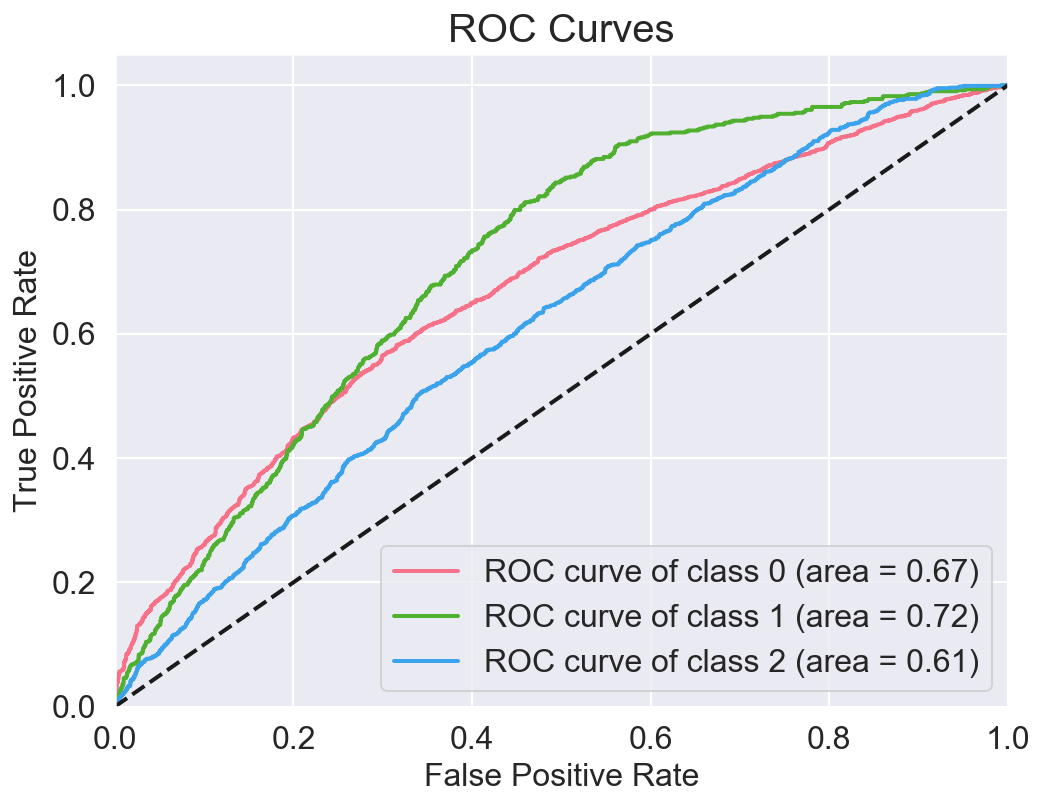

Area under ROC curve (ROC-AUC):
Class 0: 0.67
Class 1: 0.72
Class 2: 0.61


In [26]:
#ROC curve for Model 2
y_test_bin_2 = label_binarize(y_test, model_2.classes_)

skplt.metrics.plot_roc(y_test, model_2.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(model_1.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(
        y_test_bin_2[:, i], model_2.predict_proba(X_test)[:, i]), 2))

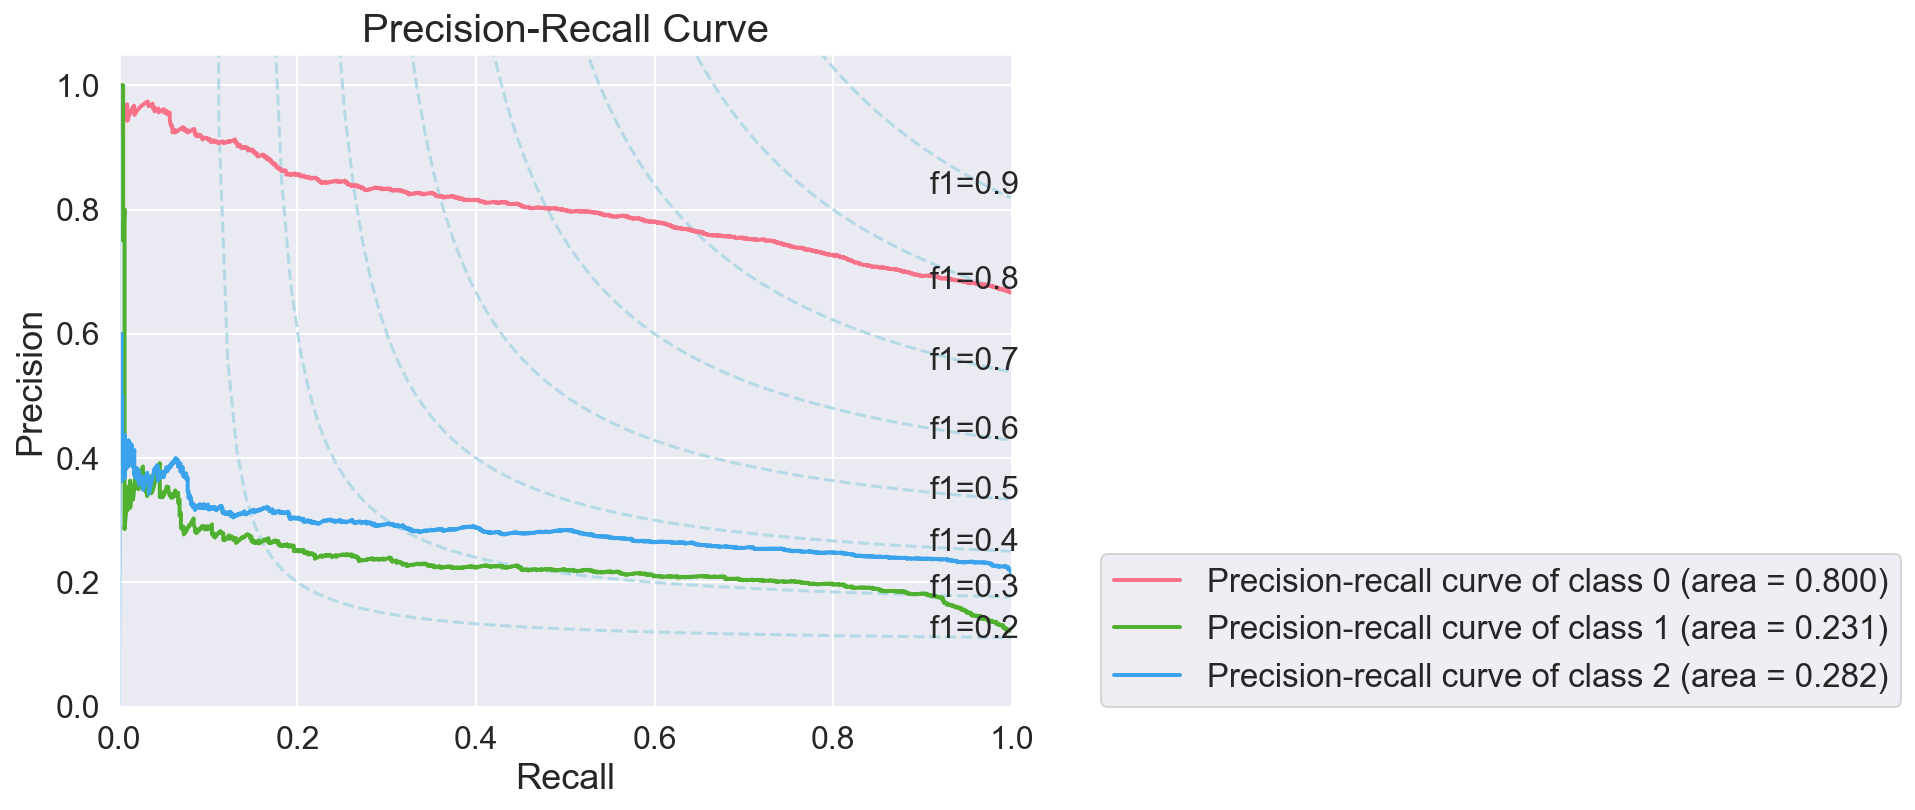

Area under precision-recall curve:
Class 0: 0.7998
Class 1: 0.2305
Class 2: 0.2817


In [27]:
#Precision-Recall curve for Model 2
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, model_2.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

print('Area under precision-recall curve:')
for i, class_ in enumerate(model_2.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(
        y_test_bin_2[:, i], model_2.predict_proba(X_test)[:, i]), 4))

Out of LogReg and LogRegCV, LogReg had higher mean CV score. Tune using model_1 with different regularisation parameters

In [28]:
#Start with Ridge:
model_1_ridge = LogisticRegression(penalty = 'l2', solver='saga', max_iter=100)
model_1_ridge.fit(X_train, y_train)
print('Training score', model_1_ridge.score(X_train, y_train))
print('Testing score', model_1_ridge.score(X_test, y_test))
print('Mean CV Score', cross_val_score(model_1_ridge, X_train, y_train, cv=5).mean())

Training score 0.6686686205736799
Testing score 0.6667947732513452
Mean CV Score 0.6681880131401746


In [29]:
#Now tune for Lasso:
model_1_lasso = LogisticRegression(penalty = 'l1', max_iter=100, solver= 'liblinear')
model_1_lasso.fit(X_train, y_train)
print('Training score', model_1_lasso.score(X_train, y_train))
print('Testing score', model_1_lasso.score(X_test, y_test))
print('Mean CV Score', cross_val_score(model_1_lasso, X_train, y_train, cv=5).mean())

Training score 0.66838033921107
Testing score 0.6666026133743275
Mean CV Score 0.6678516017689994


In [30]:
#Now tune for ElasticNet:
model_1_en = LogisticRegression(penalty = 'elasticnet', l1_ratio=1, solver='saga', max_iter=1000)
model_1_en.fit(X_train, y_train)
print('Training score', model_1_en.score(X_train, y_train))
print('Testing score', model_1_en.score(X_test, y_test))
print('Mean CV Score', cross_val_score(model_1_en, X_train, y_train, cv=5).mean())

Training score 0.6685725267861433
Testing score 0.6667947732513452
Mean CV Score 0.6681879669678754


Out of the 3 regularisation strengths, Ridge performed best - highest mean CV score.

In [31]:
#Model 3 - KNN
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

train_predictions_knn = knn.predict(X_train)
test_predictions_knn = knn.predict(X_test)
probabilities_knn = knn.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_knn, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_knn, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_knn, average='micro'))

print('Training score', knn.score(X_train, y_train))
print('Testing score', knn.score(X_test, y_test))

cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

#KNN is nonparametric so has no attribute to finding coefficients.

Precision score 0.6216372021521906
Recall score 0.6216372021521906
F1 score 0.6216372021521906
Training score 0.7116225436025561
Testing score 0.6216372021521906
CV scores [0.632957   0.62478982 0.62767235 0.63094666 0.63094666]
Mean CV Score 0.629462497877517


In [32]:
np.unique(test_predictions_knn)

array([0, 1, 2])

In [33]:
print(confusion_matrix(y_test, test_predictions_knn, labels=[0, 1, 2]))

[[3001  138  329]
 [ 496   73   64]
 [ 873   69  161]]


In [34]:
print(classification_report(y_train, train_predictions_knn, digits=4))

              precision    recall  f1-score   support

           0     0.7370    0.9252    0.8205     13868
           1     0.5842    0.2780    0.3768      2532
           2     0.5803    0.2891    0.3860      4413

    accuracy                         0.7116     20813
   macro avg     0.6338    0.4975    0.5277     20813
weighted avg     0.6852    0.7116    0.6744     20813



In [35]:
print(classification_report(y_test, test_predictions_knn, digits=4))

              precision    recall  f1-score   support

           0     0.6867    0.8653    0.7658      3468
           1     0.2607    0.1153    0.1599       633
           2     0.2906    0.1460    0.1943      1103

    accuracy                         0.6216      5204
   macro avg     0.4127    0.3755    0.3733      5204
weighted avg     0.5510    0.6216    0.5709      5204



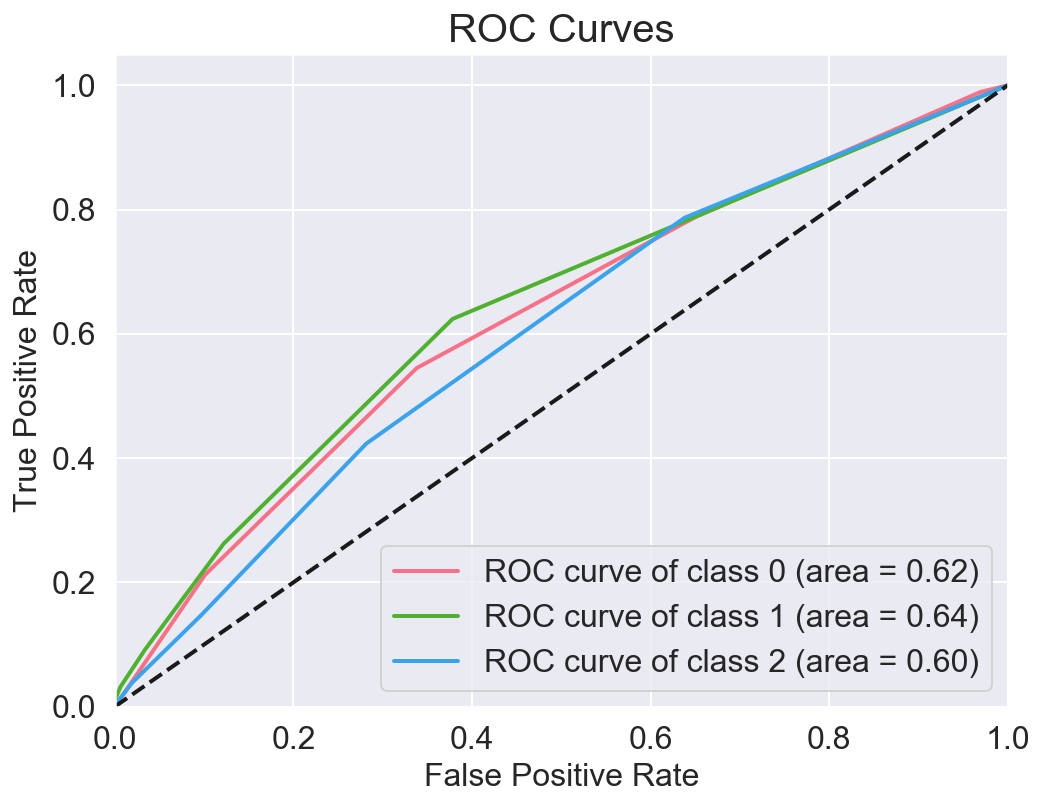

Area under ROC curve (ROC-AUC):
Class 0: 0.62
Class 1: 0.64
Class 2: 0.6


In [36]:
#ROC curve for Model 3
y_test_bin_3 = label_binarize(y_test, knn.classes_)

skplt.metrics.plot_roc(y_test, knn.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(knn.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(
        y_test_bin_3[:, i], knn.predict_proba(X_test)[:, i]), 2))

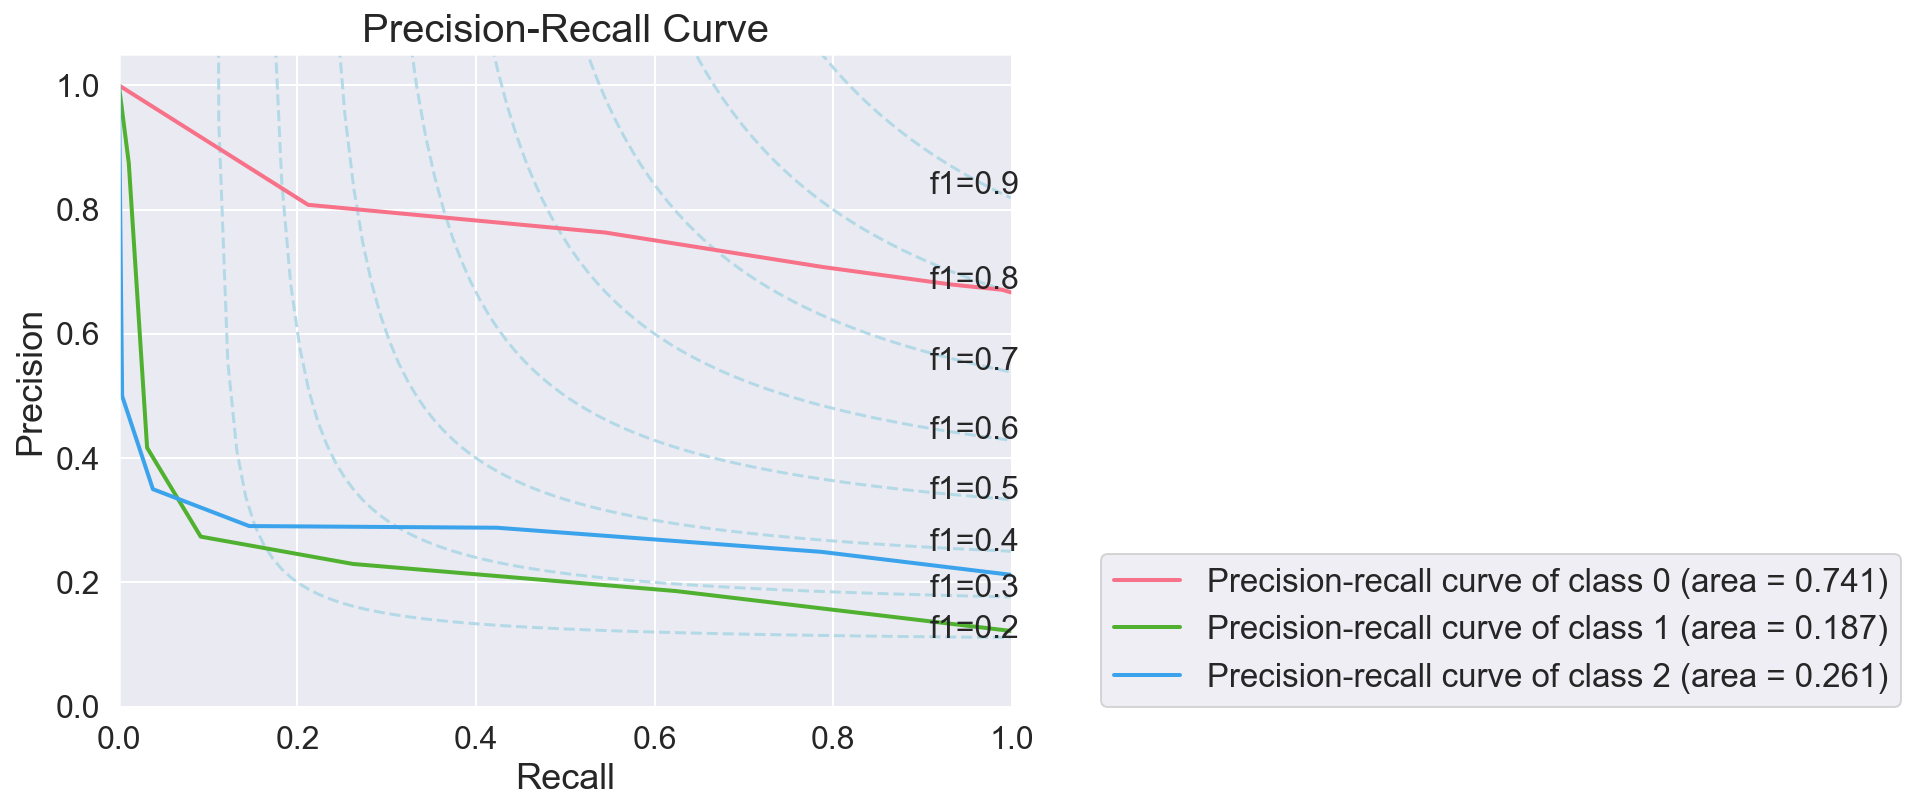

Area under precision-recall curve:
Class 0: 0.7407
Class 1: 0.1868
Class 2: 0.2608


In [37]:
#Precision-Recall curve for Model 3
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, knn.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

print('Area under precision-recall curve:')
for i, class_ in enumerate(knn.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(
        y_test_bin_3[:, i], knn.predict_proba(X_test)[:, i]), 4))

In [38]:
#Model 4 - Decision Tree Classifier 
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)

dt_classifier.fit(X_train, y_train)

train_predictions_dt = dt_classifier.predict(X_train)
test_predictions_dt = dt_classifier.predict(X_test)
probabilities_dt = dt_classifier.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_dt, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_dt, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_dt, average='micro'))

print('Training score', dt_classifier.score(X_train, y_train))
print('Testing score', dt_classifier.score(X_test, y_test))

cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

#Decision Tree is nonparametric so no coefficient parameter

Precision score 0.5980015372790162
Recall score 0.5980015372790162
F1 score 0.5980015372790162
Training score 0.8187190698121366
Testing score 0.5980015372790162
CV scores [0.59740572 0.603411   0.59980783 0.58986064 0.59586737]
Mean CV Score 0.5972705129961747


In [39]:
np.unique(test_predictions_dt)

array([0, 1, 2])

In [40]:
print(confusion_matrix(y_test, test_predictions_dt, labels=[0, 1, 2]))

[[2786  257  425]
 [ 449  109   75]
 [ 796   90  217]]


In [41]:
print(classification_report(y_train, train_predictions_dt, digits=4))

              precision    recall  f1-score   support

           0     0.8114    0.9738    0.8852     13868
           1     0.8367    0.5604    0.6712      2532
           2     0.8557    0.4797    0.6148      4413

    accuracy                         0.8187     20813
   macro avg     0.8346    0.6713    0.7237     20813
weighted avg     0.8239    0.8187    0.8018     20813



In [42]:
print(classification_report(y_test, test_predictions_dt, digits=4))

              precision    recall  f1-score   support

           0     0.6911    0.8033    0.7430      3468
           1     0.2390    0.1722    0.2002       633
           2     0.3026    0.1967    0.2385      1103

    accuracy                         0.5980      5204
   macro avg     0.4109    0.3908    0.3939      5204
weighted avg     0.5538    0.5980    0.5701      5204



In [43]:
pd.DataFrame(list(zip(X_train, dt_classifier.feature_importances_)), 
             columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False).head(10)

Feature  Importance
2        Average Release Age    0.131671
0              Year Released    0.069266
12       District_None Given    0.064635
22                  Sex_Male    0.047937
1               Tracking End    0.045767
21                Race_White    0.040975
19                Race_Black    0.039473
16    Ethnicity_Non-Hispanic    0.030404
3               District_2JD    0.029607
27  Offense Classification_6    0.028246

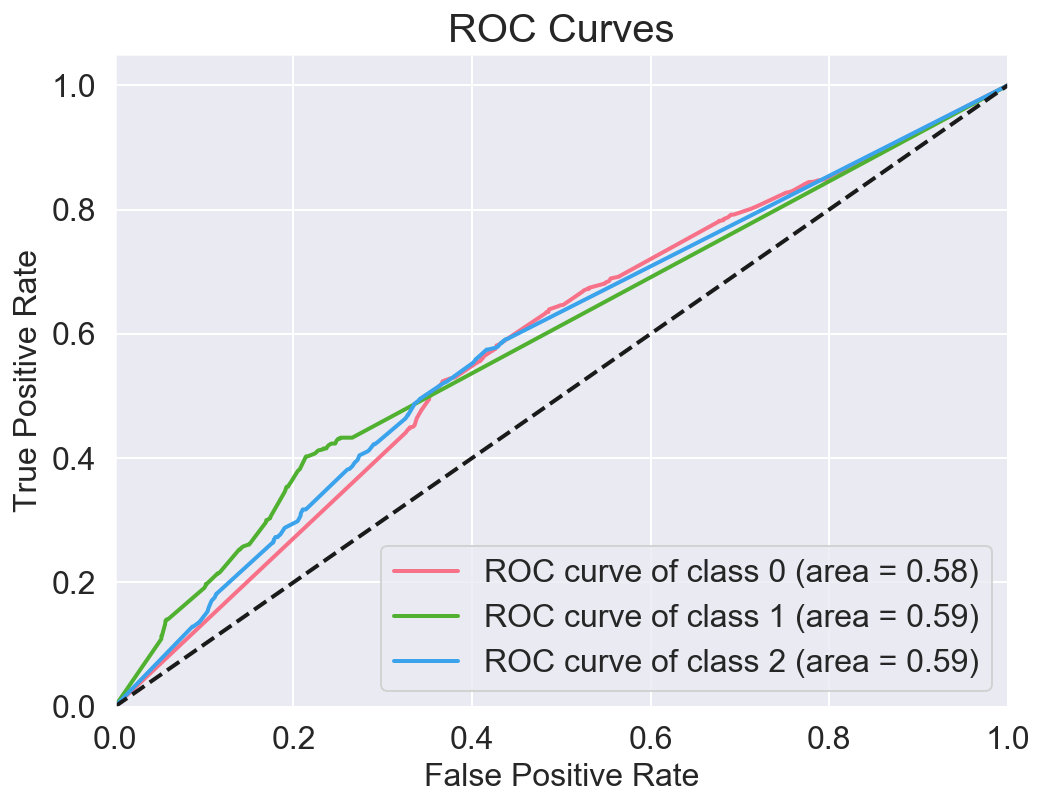

Area under ROC curve (ROC-AUC):
Class 0: 0.58
Class 1: 0.59
Class 2: 0.59


In [45]:
#ROC curve for Model 4
y_test_bin_4 = label_binarize(y_test, dt_classifier.classes_)

skplt.metrics.plot_roc(y_test, dt_classifier.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(dt_classifier.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(
        y_test_bin_4[:, i], dt_classifier.predict_proba(X_test)[:, i]), 2))

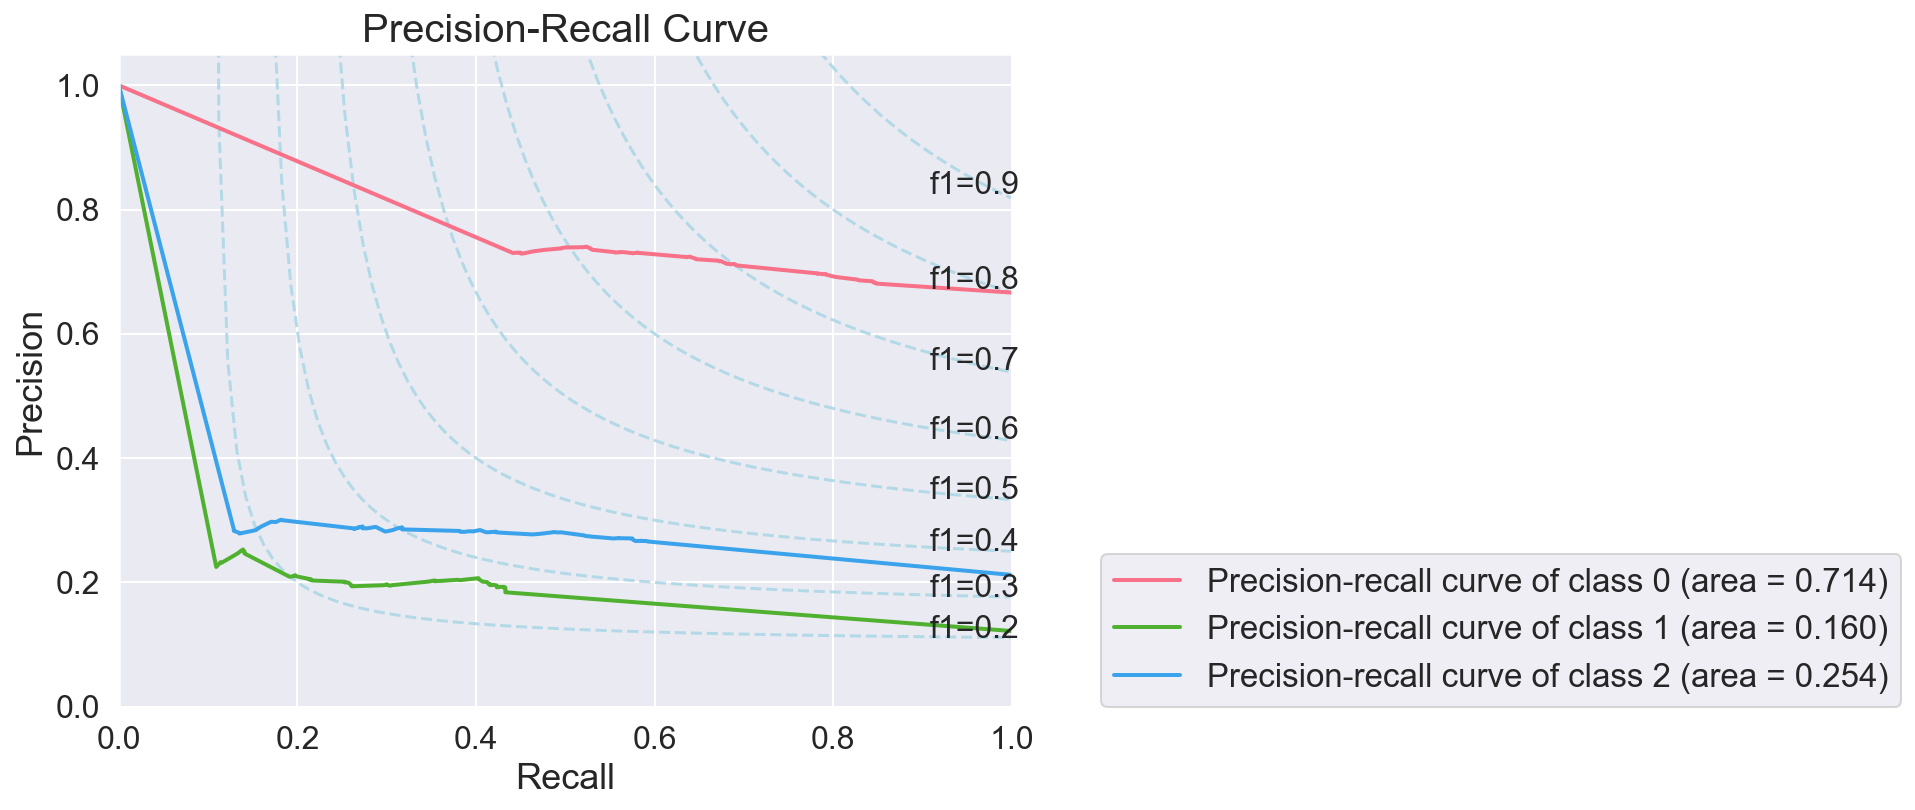

Area under precision-recall curve:
Class 0: 0.7143
Class 1: 0.1603
Class 2: 0.2536


In [46]:
#Precision-Recall curve for Model 4
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, dt_classifier.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

print('Area under precision-recall curve:')
for i, class_ in enumerate(dt_classifier.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(
        y_test_bin_4[:, i], dt_classifier.predict_proba(X_test)[:, i]), 4))

In [47]:
#Model 5 - KNN bagging
knn_bagging = BaggingClassifier(base_estimator=knn, max_samples=0.5, max_features=0.5)

knn_bagging.fit(X_train, y_train)

train_predictions_knn_bag = knn_bagging.predict(X_train)
test_predictions_knn_bag = knn_bagging.predict(X_test)
probabilities_knn_bag = knn_bagging.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_knn_bag, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_knn_bag, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_knn_bag, average='micro'))

print("Training score:\t", knn_bagging.score(X_train, y_train))
print("Test score:\t", knn_bagging.score(X_test, y_test))

cv_scores = cross_val_score(knn_bagging, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

Precision score 0.6654496541122213
Recall score 0.6654496541122213
F1 score 0.6654496541122213
Training score:	 0.672320184500072
Test score:	 0.6654496541122213
CV scores [0.66466491 0.66298343 0.66418448 0.66650649 0.66025949]
Mean CV Score 0.6637197581541145


In [48]:
knn_bagging_base_estimator = knn_bagging.base_estimator_

knn_bagging_all_base_estimators = knn_bagging.estimators_

knn_bagging_estimators_features = knn_bagging.estimators_features_

samples = knn_bagging.estimators_samples_

In [49]:
np.unique(test_predictions_knn_bag)

array([0, 1, 2])

In [50]:
print(confusion_matrix(y_test, test_predictions_knn_bag, labels=[0, 1, 2]))

[[3440   15   13]
 [ 610   16    7]
 [1091    5    7]]


In [51]:
print(classification_report(y_train, train_predictions_knn_bag, digits=4))

              precision    recall  f1-score   support

           0     0.6726    0.9943    0.8024     13868
           1     0.6859    0.0423    0.0796      2532
           2     0.6218    0.0220    0.0425      4413

    accuracy                         0.6723     20813
   macro avg     0.6601    0.3528    0.3082     20813
weighted avg     0.6634    0.6723    0.5533     20813



In [52]:
print(classification_report(y_test, test_predictions_knn_bag, digits=4))

              precision    recall  f1-score   support

           0     0.6691    0.9919    0.7992      3468
           1     0.4444    0.0253    0.0478       633
           2     0.2593    0.0063    0.0124      1103

    accuracy                         0.6654      5204
   macro avg     0.4576    0.3412    0.2865      5204
weighted avg     0.5549    0.6654    0.5410      5204



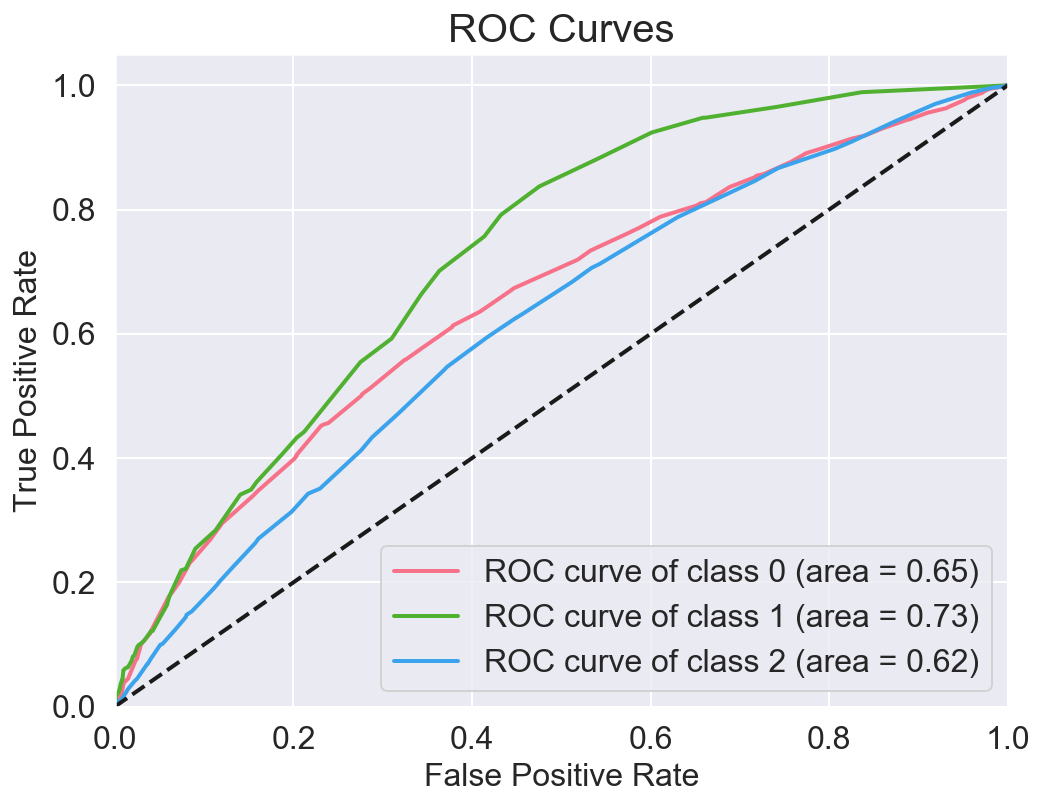

Area under ROC curve (ROC-AUC):
Class 0: 0.65
Class 1: 0.73
Class 2: 0.62


In [53]:
#ROC curve for Model 5
y_test_bin_5 = label_binarize(y_test, knn_bagging.classes_)

skplt.metrics.plot_roc(y_test, knn_bagging.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(knn_bagging.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(
        y_test_bin_5[:, i], knn_bagging.predict_proba(X_test)[:, i]), 2))

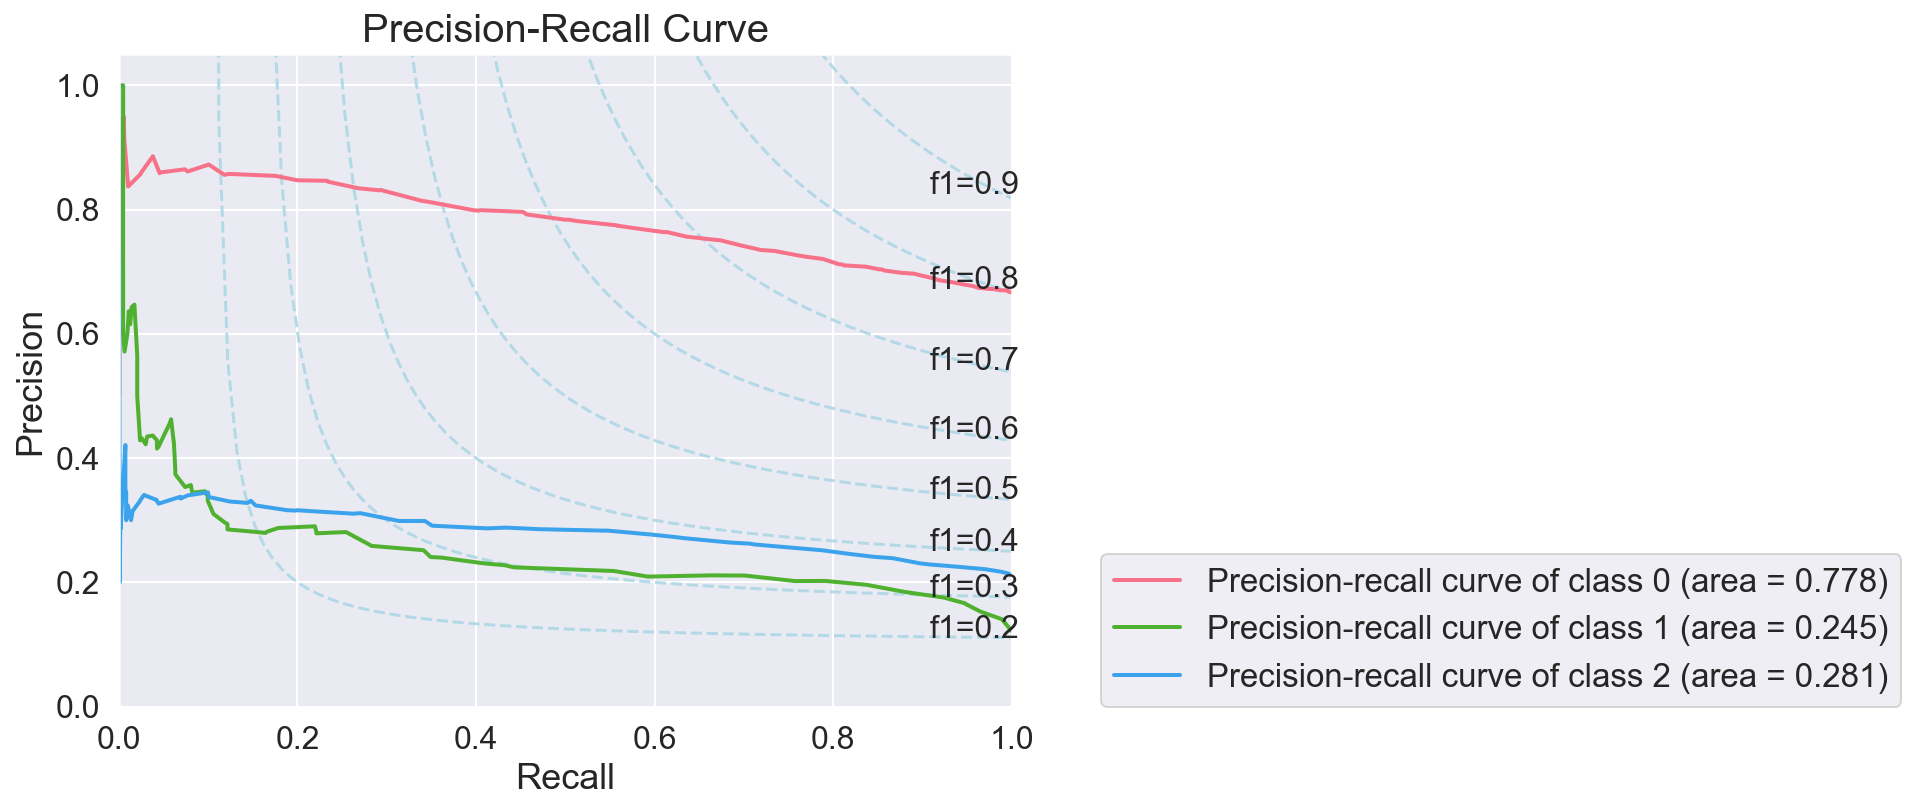

Area under precision-recall curve:
Class 0: 0.7784
Class 1: 0.2451
Class 2: 0.2806


In [54]:
#Precision-Recall curve for Model 5
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, knn_bagging.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

print('Area under precision-recall curve:')
for i, class_ in enumerate(knn_bagging.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(
        y_test_bin_5[:, i], knn_bagging.predict_proba(X_test)[:, i]), 4))

In [55]:
#Model 6 - DT Bagging
dt_bagging = BaggingClassifier(base_estimator=dt_classifier,max_samples=0.8, max_features=0.8, n_estimators=100)

dt_bagging.fit(X_train, y_train)

train_predictions_dt_bag = dt_bagging.predict(X_train)
test_predictions_dt_bag = dt_bagging.predict(X_test)
probabilities_dt_bag = dt_bagging.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_dt_bag, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_dt_bag, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_dt_bag, average='micro'))

print("Training score", dt_bagging.score(X_train, y_train))
print("Test score", dt_bagging.score(X_test, y_test))

cv_scores = cross_val_score(dt_bagging, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

Precision score 0.6354727132974635
Recall score 0.6354727132974635
F1 score 0.6354727132974635
Training score 0.8047854706193245
Test score 0.6354727132974635
CV scores [0.63800144 0.64088398 0.6370406  0.63166747 0.63623258]
Mean CV Score 0.6367652125893853


In [56]:
dt_bagging_base_estimator = dt_bagging.base_estimator_

dt_bagging_all_base_estimators = dt_bagging.estimators_

dt_bagging_estimators_features = dt_bagging.estimators_features_

samples = dt_bagging.estimators_samples_

In [57]:
np.unique(test_predictions_dt_bag)

array([0, 1, 2])

In [58]:
print(confusion_matrix(y_test, test_predictions_dt_bag, labels=[0, 1, 2]))

[[3066  131  271]
 [ 494   70   69]
 [ 868   64  171]]


In [59]:
print(classification_report(y_train, train_predictions_dt_bag, digits=4))

              precision    recall  f1-score   support

           0     0.7966    0.9740    0.8764     13868
           1     0.8580    0.4964    0.6290      2532
           2     0.8302    0.4498    0.5835      4413

    accuracy                         0.8048     20813
   macro avg     0.8283    0.6401    0.6963     20813
weighted avg     0.8112    0.8048    0.7842     20813



In [60]:
print(classification_report(y_test, test_predictions_dt_bag, digits=4))

              precision    recall  f1-score   support

           0     0.6924    0.8841    0.7766      3468
           1     0.2642    0.1106    0.1559       633
           2     0.3346    0.1550    0.2119      1103

    accuracy                         0.6355      5204
   macro avg     0.4304    0.3832    0.3815      5204
weighted avg     0.5645    0.6355    0.5814      5204



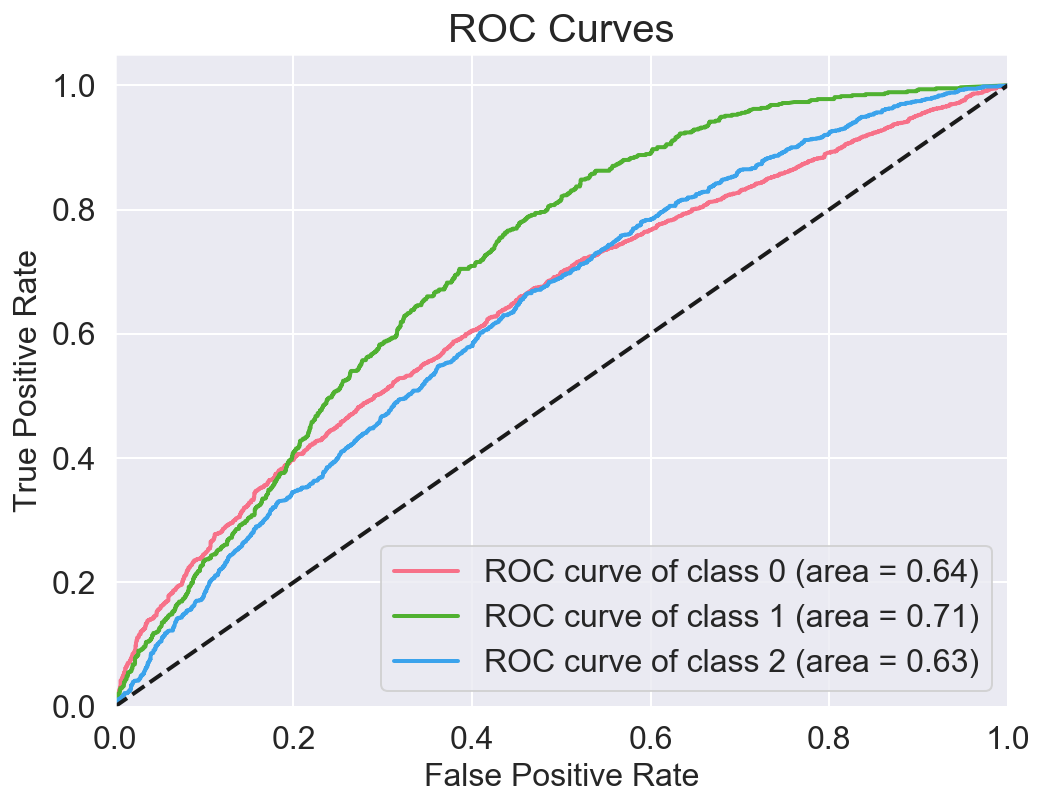

Area under ROC curve (ROC-AUC):
Class 0: 0.64
Class 1: 0.71
Class 2: 0.63


In [61]:
#ROC curve for Model 6
y_test_bin_6 = label_binarize(y_test, dt_bagging.classes_)

skplt.metrics.plot_roc(y_test, dt_bagging.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(dt_bagging.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(
        y_test_bin_6[:, i], dt_bagging.predict_proba(X_test)[:, i]), 2))

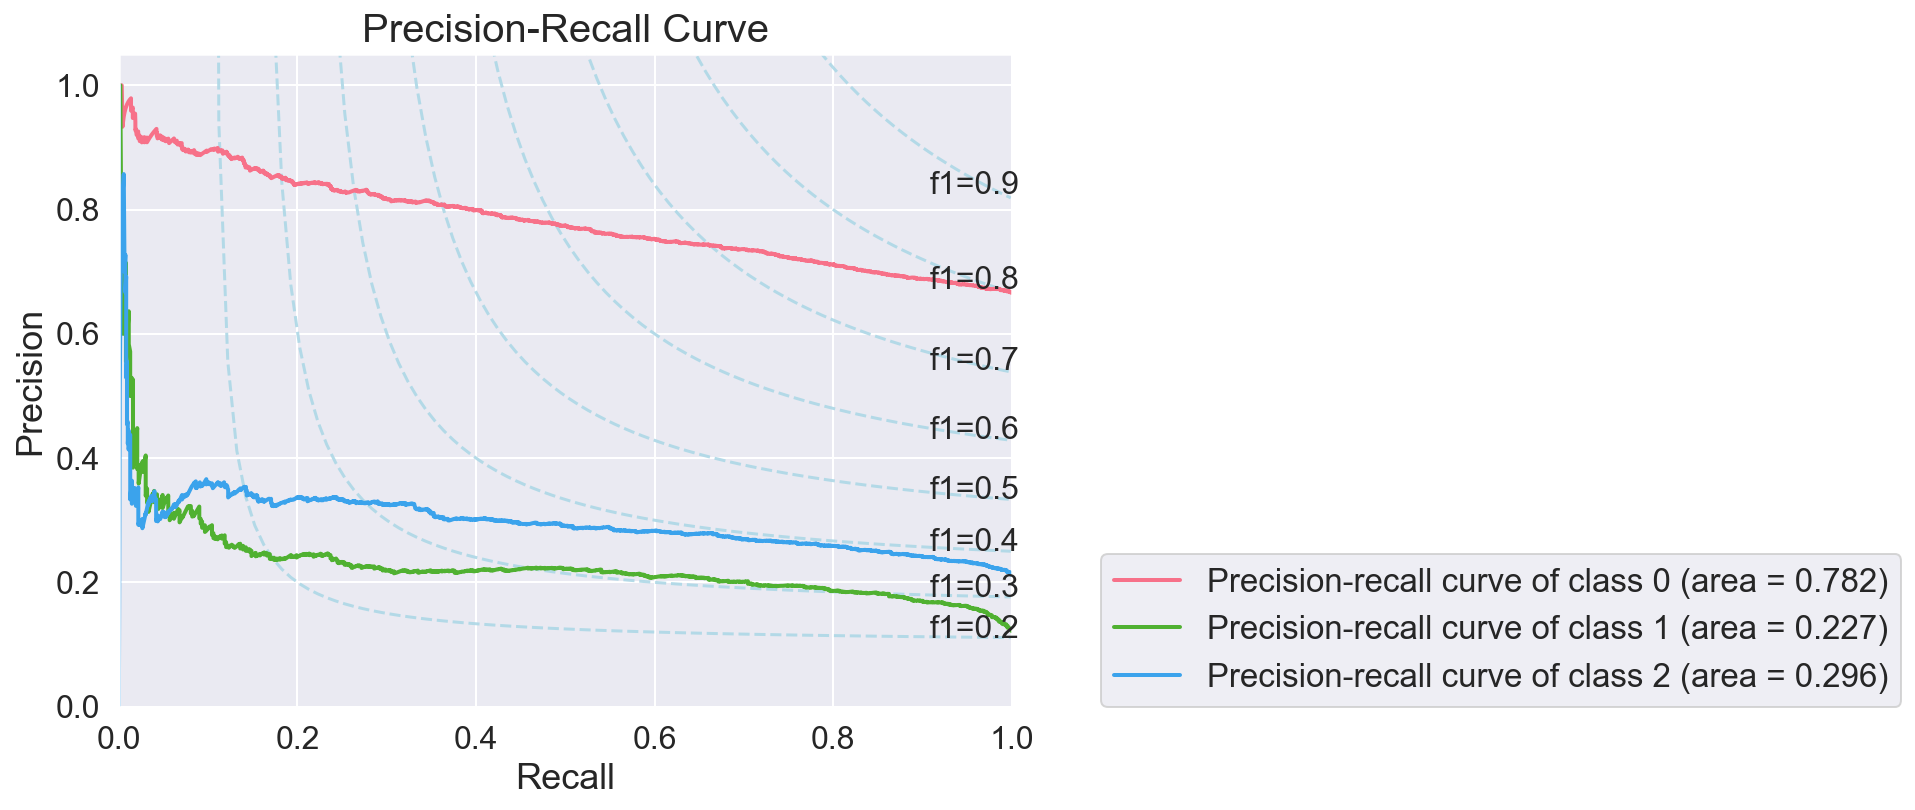

Area under precision-recall curve:
Class 0: 0.7821
Class 1: 0.2267
Class 2: 0.2964


In [62]:
#Precision-Recall curve for Model 6
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, dt_bagging.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

print('Area under precision-recall curve:')
for i, class_ in enumerate(dt_bagging.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(
        y_test_bin_6[:, i], dt_bagging.predict_proba(X_test)[:, i]), 4))

KNN Bagging performed better than DT bagging did

In [63]:
#Model 7 - Random Forest
rfc=RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

train_predictions_rfc = rfc.predict(X_train)
test_predictions_rfc = rfc.predict(X_test)
probabilities_rfc = rfc.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_rfc, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_rfc, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_rfc, average='micro'))

print("Training score", rfc.score(X_train, y_train))
print("Test score", rfc.score(X_test, y_test))

cv_scores = cross_val_score(rfc, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

Precision score 0.6179861644888547
Recall score 0.6179861644888547
F1 score 0.6179861644888547
Training score 0.8187190698121366
Test score 0.6179861644888547
CV scores [0.6180639  0.61878453 0.61542157 0.61100432 0.61244594]
Mean CV Score 0.6151440523787794


In [64]:
np.unique(test_predictions_rfc)

array([0, 1, 2])

In [65]:
print(confusion_matrix(y_test, test_predictions_rfc, labels=[0, 1, 2]))

[[2912  175  381]
 [ 455   87   91]
 [ 802   84  217]]


In [66]:
print(classification_report(y_train, train_predictions_rfc, digits=4))

              precision    recall  f1-score   support

           0     0.8270    0.9501    0.8843     13868
           1     0.8016    0.5873    0.6779      2532
           2     0.7855    0.5386    0.6391      4413

    accuracy                         0.8187     20813
   macro avg     0.8047    0.6920    0.7338     20813
weighted avg     0.8151    0.8187    0.8072     20813



In [67]:
print(classification_report(y_test, test_predictions_rfc, digits=4))

              precision    recall  f1-score   support

           0     0.6985    0.8397    0.7626      3468
           1     0.2514    0.1374    0.1777       633
           2     0.3149    0.1967    0.2422      1103

    accuracy                         0.6180      5204
   macro avg     0.4216    0.3913    0.3942      5204
weighted avg     0.5628    0.6180    0.5812      5204



In [68]:
pd.DataFrame(list(zip(X_train, rfc.feature_importances_)), 
             columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False).head(10)

Feature  Importance
2        Average Release Age    0.202401
0              Year Released    0.083052
1               Tracking End    0.082779
22                  Sex_Male    0.046064
21                Race_White    0.036882
19                Race_Black    0.032642
12       District_None Given    0.030518
6               District_5JD    0.027968
3               District_2JD    0.026296
26  Offense Classification_5    0.025693

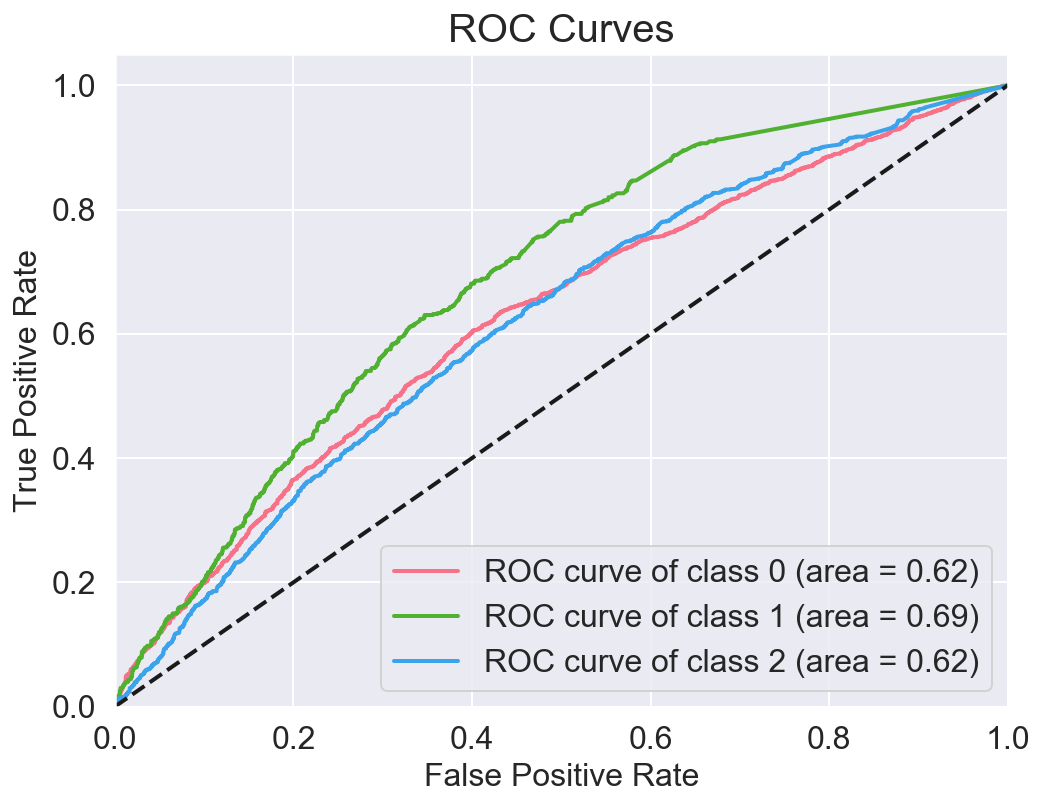

Area under ROC curve (ROC-AUC):
Class 0: 0.62
Class 1: 0.69
Class 2: 0.62


In [69]:
#ROC curve for Model 7
y_test_bin_7 = label_binarize(y_test, rfc.classes_)

skplt.metrics.plot_roc(y_test, rfc.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(rfc.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(
        y_test_bin_7[:, i], rfc.predict_proba(X_test)[:, i]), 2))

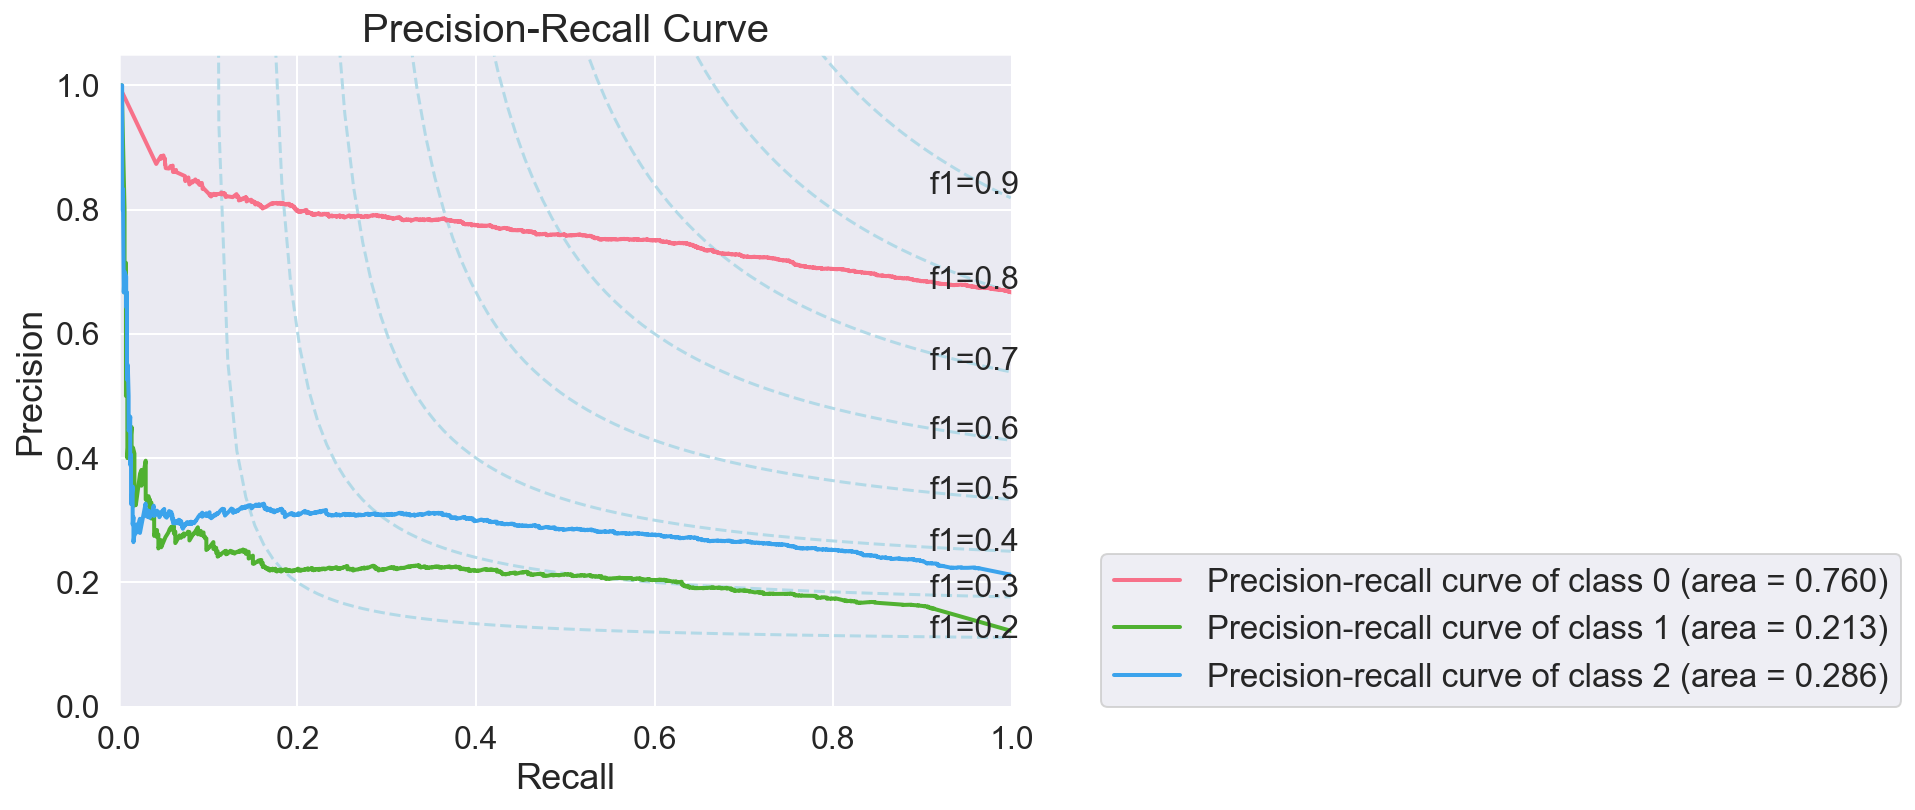

Area under precision-recall curve:
Class 0: 0.7597
Class 1: 0.2132
Class 2: 0.2862


In [70]:
#Precision-Recall curve for Model 7
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, rfc.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

print('Area under precision-recall curve:')
for i, class_ in enumerate(rfc.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(
        y_test_bin_7[:, i], rfc.predict_proba(X_test)[:, i]), 4))

In [71]:
#Model 8 - AdaBoost Classifier
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=1)

abc.fit(X_train, y_train)

train_predictions_abc = abc.predict(X_train)
test_predictions_abc = abc.predict(X_test)
probabilities_abc = abc.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_abc, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_abc, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_abc, average='micro'))

print("Training score", abc.score(X_train, y_train))
print("Test score", abc.score(X_test, y_test))

cv_scores = cross_val_score(abc, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

Precision score 0.6535357417371253
Recall score 0.6535357417371253
F1 score 0.6535357417371253
Training score 0.6782299524335752
Test score 0.6535357417371253
CV scores [0.65865962 0.65697814 0.65337497 0.65233061 0.65353196]
Mean CV Score 0.6549750594554925


In [72]:
#AdaBoost feature importances
pd.DataFrame(list(zip(X_train, abc.feature_importances_)), 
             columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False).head(10)

Feature  Importance
2        Average Release Age    0.113599
0              Year Released    0.071001
1               Tracking End    0.061771
14       Release Type_Parole    0.043195
22                  Sex_Male    0.036446
21                Race_White    0.034606
24  Offense Classification_3    0.032956
12       District_None Given    0.032300
27  Offense Classification_6    0.029407
5               District_4JD    0.028780

In [73]:
np.unique(test_predictions_abc)

array([0, 1, 2])

In [74]:
print(confusion_matrix(y_test, test_predictions_abc, labels=[0, 1, 2]))

[[3238   92  138]
 [ 552   63   18]
 [ 978   25  100]]


In [75]:
print(classification_report(y_train, train_predictions_abc, digits=4))

              precision    recall  f1-score   support

           0     0.6924    0.9518    0.8017     13868
           1     0.5408    0.1596    0.2464      2532
           2     0.5105    0.1160    0.1891      4413

    accuracy                         0.6782     20813
   macro avg     0.5812    0.4091    0.4124     20813
weighted avg     0.6354    0.6782    0.6042     20813



In [76]:
print(classification_report(y_test, test_predictions_abc, digits=4))

              precision    recall  f1-score   support

           0     0.6791    0.9337    0.7863      3468
           1     0.3500    0.0995    0.1550       633
           2     0.3906    0.0907    0.1472      1103

    accuracy                         0.6535      5204
   macro avg     0.4732    0.3746    0.3628      5204
weighted avg     0.5779    0.6535    0.5740      5204



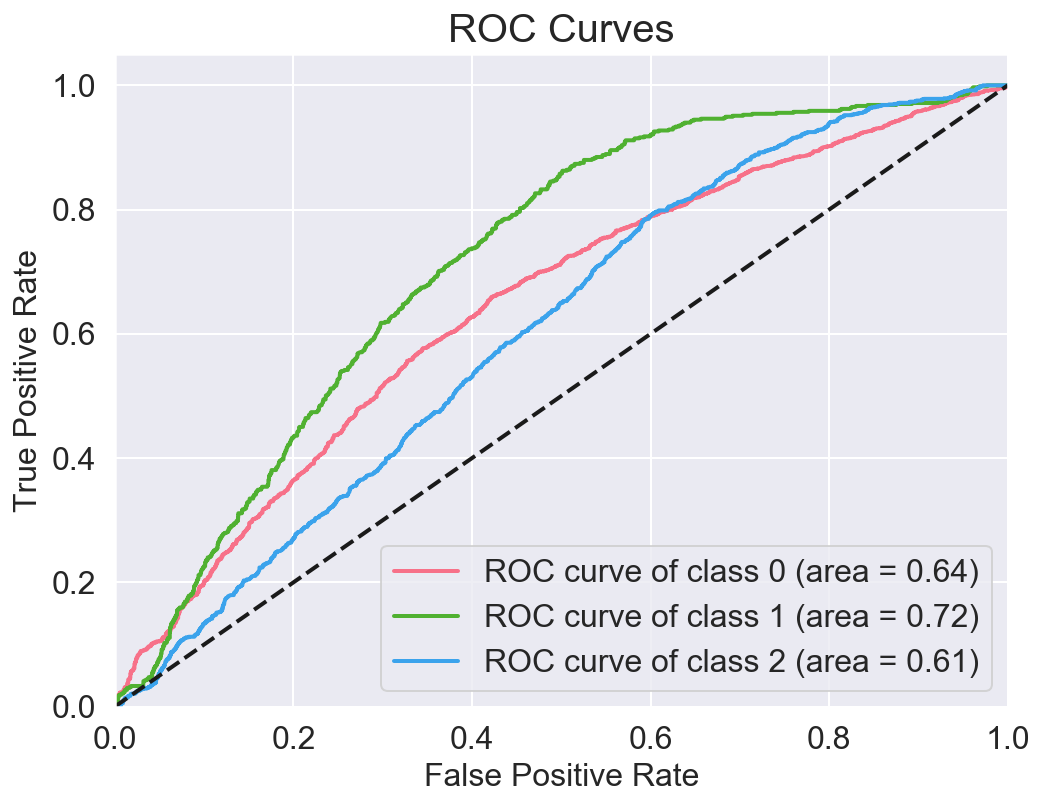

Area under ROC curve (ROC-AUC):
Class 0: 0.64
Class 1: 0.72
Class 2: 0.61


In [77]:
#ROC curve for Model 8
y_test_bin_8 = label_binarize(y_test, abc.classes_)

skplt.metrics.plot_roc(y_test, abc.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(abc.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(
        y_test_bin_8[:, i], abc.predict_proba(X_test)[:, i]), 2))

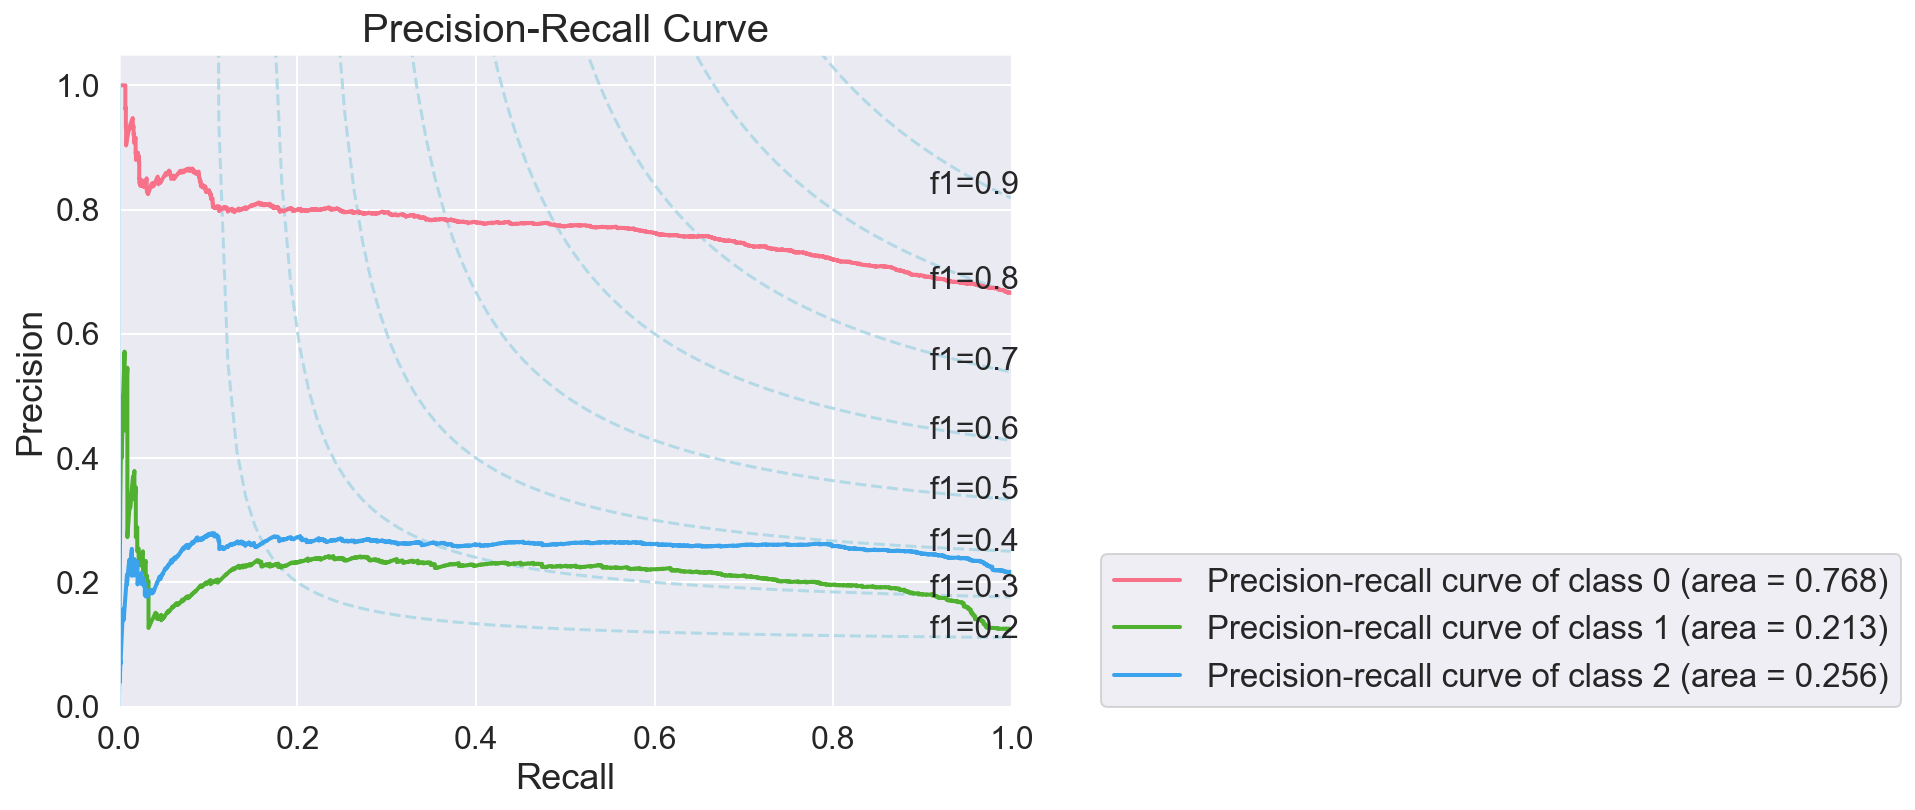

Area under precision-recall curve:
Class 0: 0.7685
Class 1: 0.2135
Class 2: 0.2555


In [78]:
#Precision-Recall curve for Model 8
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, abc.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

print('Area under precision-recall curve:')
for i, class_ in enumerate(abc.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(
        y_test_bin_8[:, i], abc.predict_proba(X_test)[:, i]), 4))

In [79]:
#Model 9 - Gradient Boost Classifier
gbc = GradientBoostingClassifier(n_estimators=100, criterion='mse',  
                                 max_depth=3, learning_rate=0.1, random_state=1)

gbc.fit(X_train, y_train)

train_predictions_gbc = gbc.predict(X_train)
test_predictions_gbc = gbc.predict(X_test)
probabilities_gbc = gbc.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_gbc, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_gbc, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_gbc, average='micro'))

print("Training score", gbc.score(X_train, y_train))
print("Test score", gbc.score(X_test, y_test))

cv_scores = cross_val_score(gbc, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

Precision score 0.6691006917755573
Recall score 0.6691006917755573
F1 score 0.6691006917755573
Training score 0.6748666698697929
Test score 0.6691006917755573
CV scores [0.67523421 0.66778765 0.67283209 0.66722729 0.67083133]
Mean CV Score 0.6707825154276079


In [80]:
#Gradient Boost Feature Importances
pd.DataFrame(list(zip(X_train, gbc.feature_importances_)), 
             columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False).head(10)


Feature  Importance
12            District_None Given    0.292098
2             Average Release Age    0.083273
1                    Tracking End    0.083042
0                   Year Released    0.072455
14            Release Type_Parole    0.043721
15  Release Type_Special Sentence    0.038096
6                    District_5JD    0.031863
33           Offense Type_Violent    0.031798
24       Offense Classification_3    0.027414
10                   District_ISC    0.024422

In [81]:
np.unique(test_predictions_gbc)

array([0, 1, 2])

In [82]:
print(confusion_matrix(y_test, test_predictions_gbc, labels=[0, 1, 2]))

[[3414   27   27]
 [ 603   27    3]
 [1057    5   41]]


In [83]:
print(classification_report(y_train, train_predictions_gbc, digits=4))

              precision    recall  f1-score   support

           0     0.6761    0.9861    0.8022     13868
           1     0.6572    0.0735    0.1321      2532
           2     0.6106    0.0419    0.0785      4413

    accuracy                         0.6749     20813
   macro avg     0.6480    0.3672    0.3376     20813
weighted avg     0.6599    0.6749    0.5672     20813



In [84]:
print(classification_report(y_test, test_predictions_gbc, digits=4))

              precision    recall  f1-score   support

           0     0.6728    0.9844    0.7993      3468
           1     0.4576    0.0427    0.0780       633
           2     0.5775    0.0372    0.0698      1103

    accuracy                         0.6691      5204
   macro avg     0.5693    0.3548    0.3157      5204
weighted avg     0.6264    0.6691    0.5570      5204



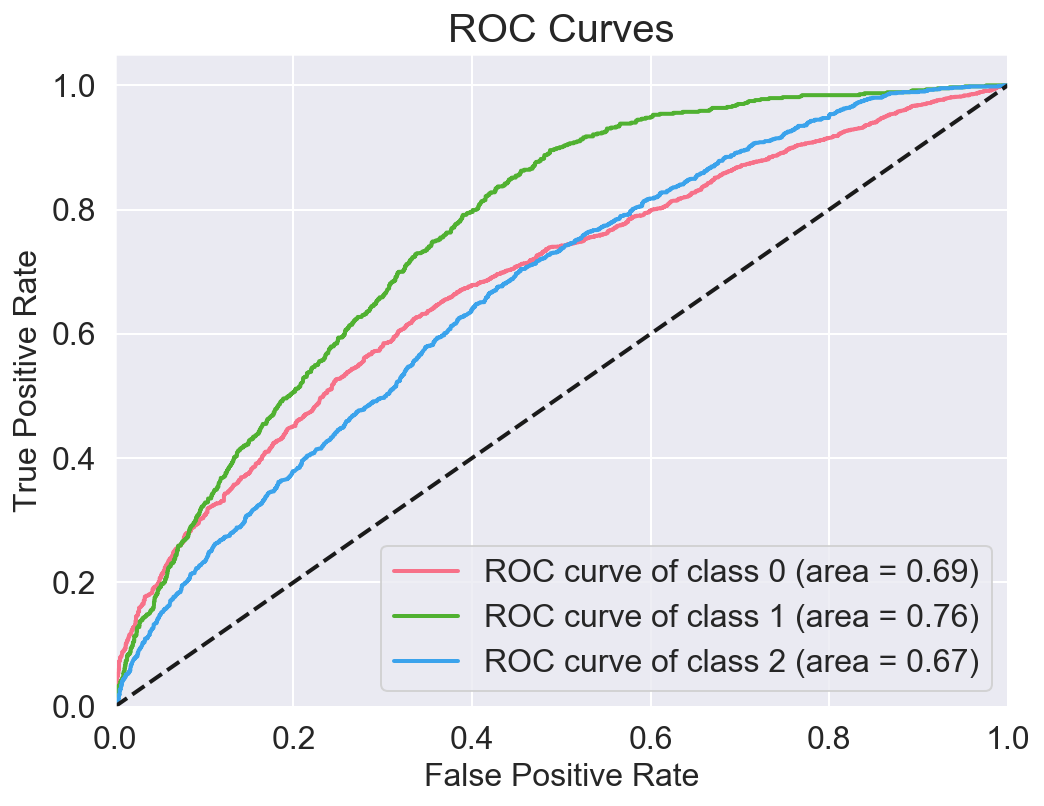

Area under ROC curve (ROC-AUC):
Class 0: 0.69
Class 1: 0.76
Class 2: 0.67


In [85]:
#ROC curve for Model 9
y_test_bin_9 = label_binarize(y_test, gbc.classes_)

skplt.metrics.plot_roc(y_test, gbc.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(gbc.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(
        y_test_bin_9[:, i], gbc.predict_proba(X_test)[:, i]), 2))

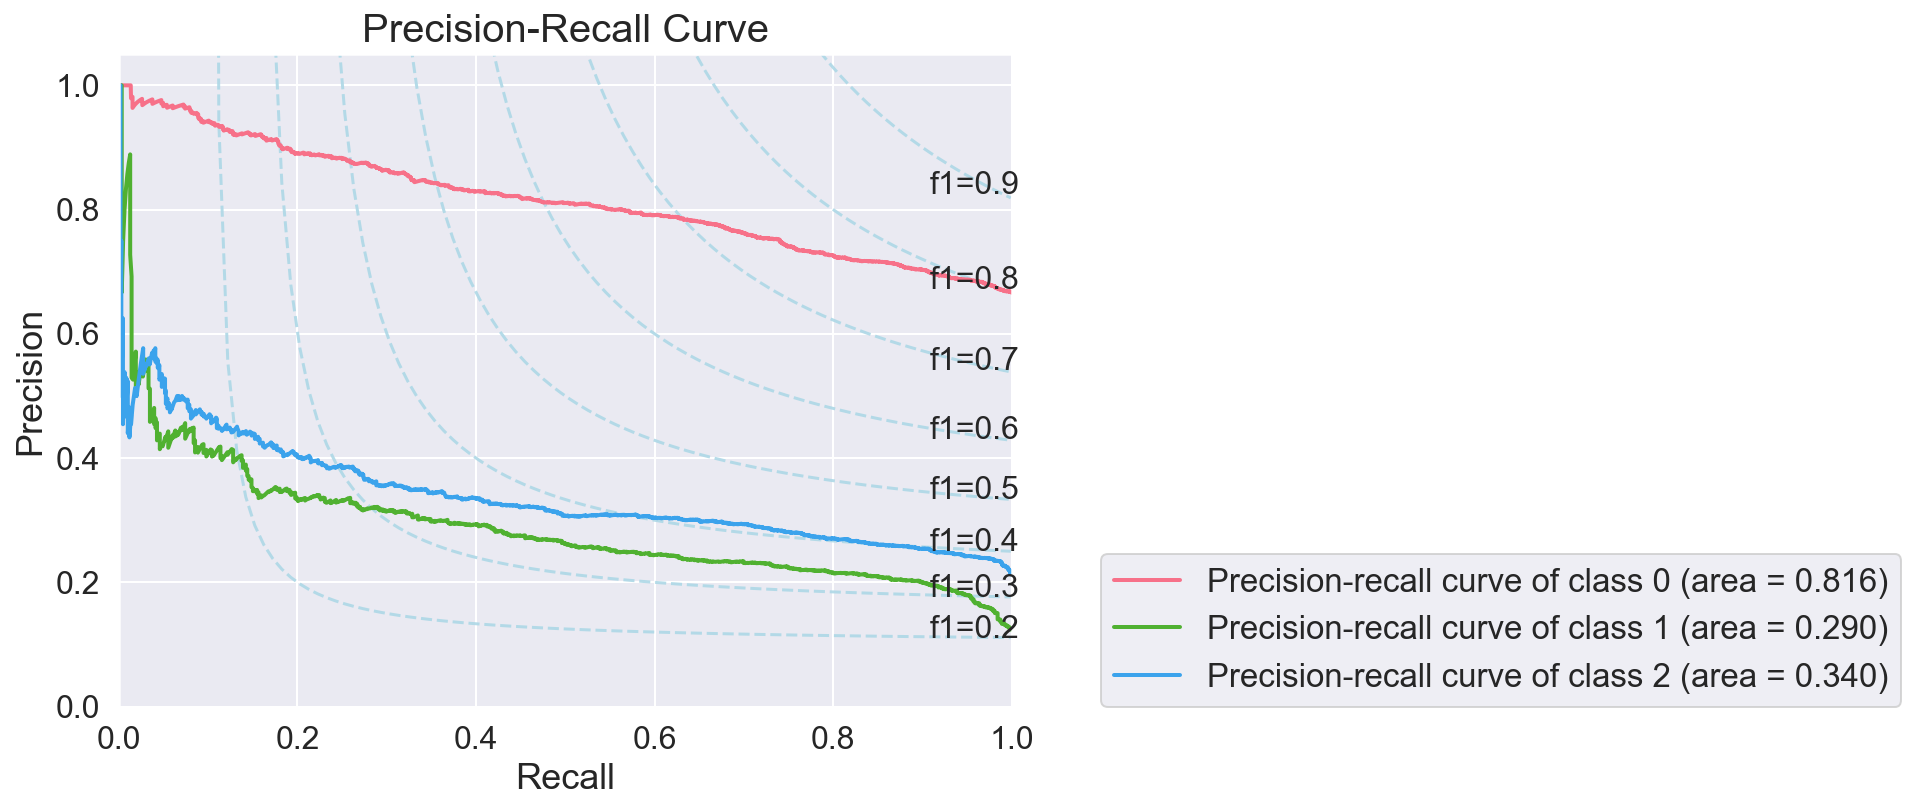

Area under precision-recall curve:
Class 0: 0.8155
Class 1: 0.2895
Class 2: 0.3397


In [86]:
#Precision-Recall curve for Model 9
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, gbc.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

print('Area under precision-recall curve:')
for i, class_ in enumerate(gbc.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(
        y_test_bin_9[:, i], gbc.predict_proba(X_test)[:, i]), 4))

In [87]:
#Model 10 - Naive Bayes
nb_B = naive_bayes.BernoulliNB(binarize=None)

nb_B.fit(X_train, y_train)

train_predictions_nb_B = nb_B.predict(X_train)
test_predictions_nb_B = nb_B.predict(X_test)
probabilities_nb_B = nb_B.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_nb_B, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_nb_B, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_nb_B, average='micro'))

print('Training score', nb_B.score(X_train, y_train))
print('Testing score', nb_B.score(X_test, y_test))

cv_scores = cross_val_score(nb_B, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

Precision score 0.6101076095311299
Recall score 0.6101076095311299
F1 score 0.6101076095311299
Training score 0.6139912554653342
Testing score 0.6101076095311299
CV scores [0.61782368 0.6202258  0.61446073 0.59923114 0.60740029]
Mean CV Score 0.6118283272364737


In [88]:
np.unique(test_predictions_nb_B)

array([0, 1, 2])

In [89]:
print(confusion_matrix(y_test, test_predictions_nb_B, labels=[0, 1, 2]))

[[2919  465   84]
 [ 397  209   27]
 [ 836  220   47]]


In [90]:
print(classification_report(y_train, train_predictions_nb_B, digits=4))

              precision    recall  f1-score   support

           0     0.7020    0.8429    0.7661     13868
           1     0.2437    0.3345    0.2820      2532
           2     0.3528    0.0548    0.0949      4413

    accuracy                         0.6140     20813
   macro avg     0.4328    0.4108    0.3810     20813
weighted avg     0.5722    0.6140    0.5649     20813



In [91]:
print(classification_report(y_test, test_predictions_nb_B, digits=4))

              precision    recall  f1-score   support

           0     0.7030    0.8417    0.7661      3468
           1     0.2338    0.3302    0.2737       633
           2     0.2975    0.0426    0.0745      1103

    accuracy                         0.6101      5204
   macro avg     0.4114    0.4048    0.3715      5204
weighted avg     0.5600    0.6101    0.5597      5204



In [96]:
#Model 11 - Naive Bayes MultinomialNB
nb_M = naive_bayes.MultinomialNB()

nb_M.fit(X_train, y_train)

train_predictions_nb_M = nb_M.predict(X_train)
test_predictions_nb_M = nb_M.predict(X_test)
probabilities_nb_M = nb_M.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_nb_M, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_nb_M, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_nb_M, average='micro'))

print('Training score', nb_M.score(X_train, y_train))
print('Testing score', nb_M.score(X_test, y_test))

cv_scores = cross_val_score(nb_M, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

Precision score 0.6550730207532667
Recall score 0.6550730207532667
F1 score 0.6550730207532667
Training score 0.6547830682746361
Testing score 0.6550730207532667
CV scores [0.65313476 0.65697814 0.65505645 0.65209034 0.6516098 ]
Mean CV Score 0.6537738986377211


In [97]:
np.unique(test_predictions_nb_M)

array([0, 1, 2])

In [98]:
print(confusion_matrix(y_test, test_predictions_nb_M, labels=[0, 1, 2]))

[[3327  131   10]
 [ 551   79    3]
 [1026   74    3]]


In [99]:
print(classification_report(y_train, train_predictions_nb_M, digits=4))

              precision    recall  f1-score   support

           0     0.6778    0.9567    0.7935     13868
           1     0.2857    0.1311    0.1798      2532
           2     0.3684    0.0063    0.0125      4413

    accuracy                         0.6548     20813
   macro avg     0.4440    0.3647    0.3286     20813
weighted avg     0.5645    0.6548    0.5532     20813



In [100]:
print(classification_report(y_test, test_predictions_nb_M, digits=4))

              precision    recall  f1-score   support

           0     0.6784    0.9593    0.7948      3468
           1     0.2782    0.1248    0.1723       633
           2     0.1875    0.0027    0.0054      1103

    accuracy                         0.6551      5204
   macro avg     0.3814    0.3623    0.3242      5204
weighted avg     0.5257    0.6551    0.5518      5204



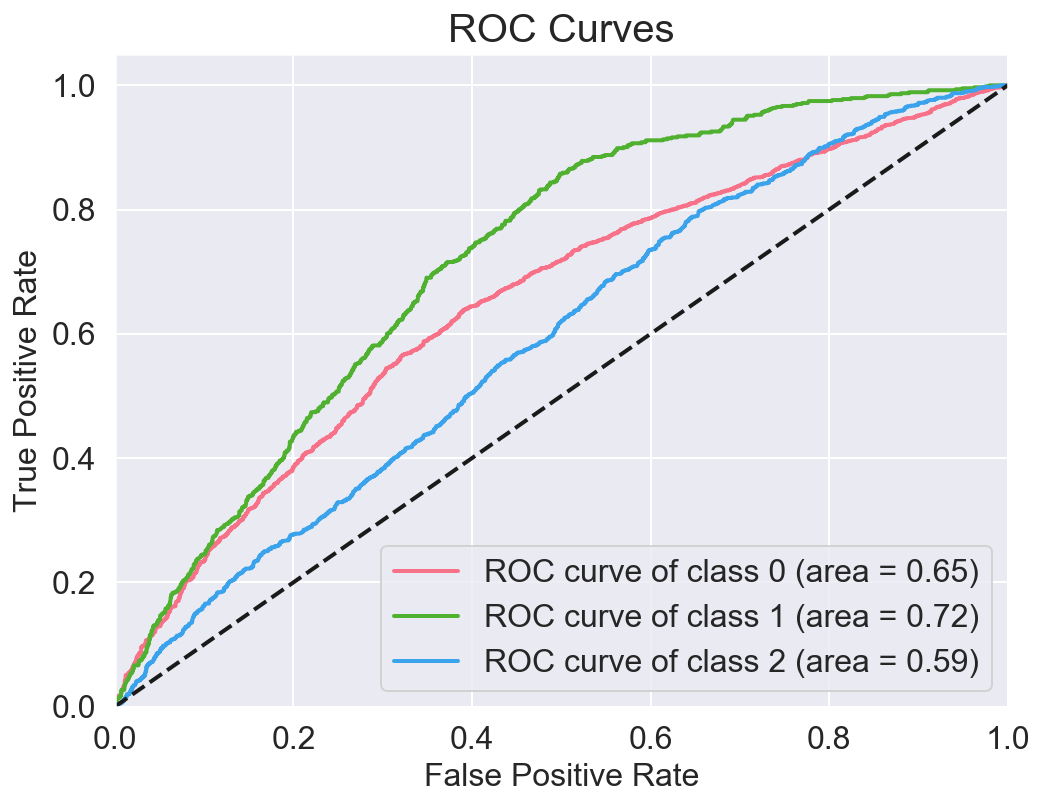

Area under ROC curve (ROC-AUC):
Class 0: 0.65
Class 1: 0.72
Class 2: 0.59


In [101]:
#ROC curve for Model 11
y_test_bin_11 = label_binarize(y_test, nb_M.classes_)

skplt.metrics.plot_roc(y_test, nb_M.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(nb_M.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(
        y_test_bin_11[:, i], nb_M.predict_proba(X_test)[:, i]), 2))

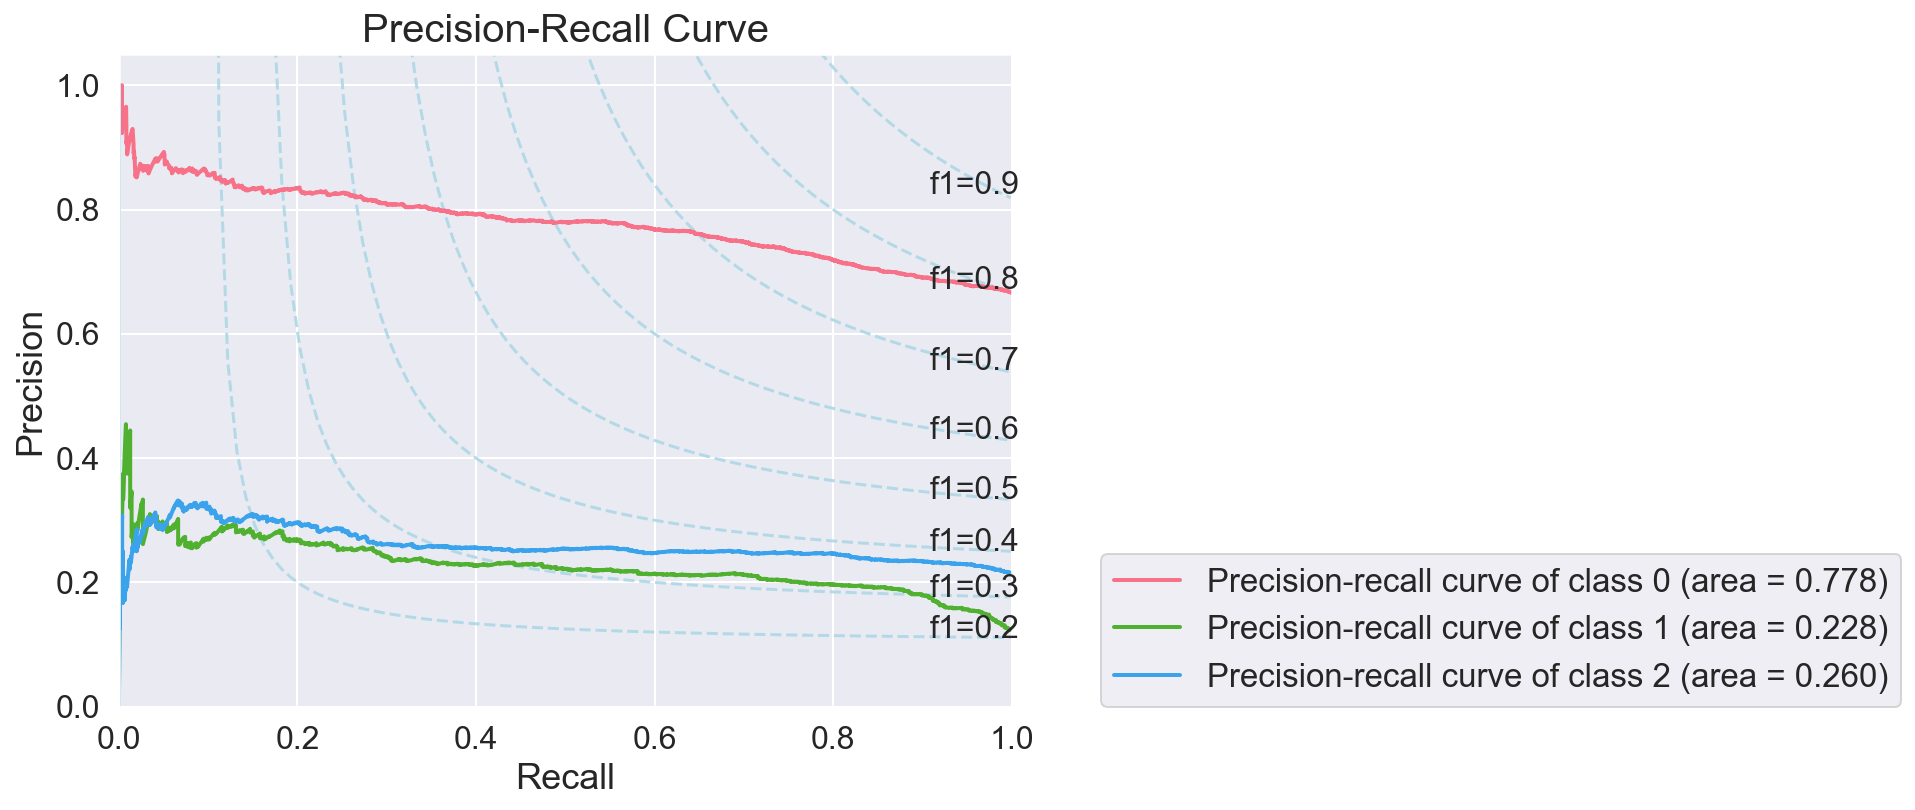

Areab under precision-recall curve:
Class 0: 0.7779
Class 1: 0.2276
Class 2: 0.2603


In [102]:
#Precision-Recall curve for Model 11
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, nb_M.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

print('Areab under precision-recall curve:')
for i, class_ in enumerate(nb_M.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(
        y_test_bin_11[:, i], nb_M.predict_proba(X_test)[:, i]), 4))

In [103]:
#Model 12 - SVC linear
svc_lin = SVC(kernel='linear', gamma='scale')

svc_lin.fit(X_train, y_train)

train_predictions_svc_lin = svc_lin.predict(X_train)
test_predictions_svc_lin = svc_lin.predict(X_test)

print('Precision score', precision_score(y_test, test_predictions_svc_lin, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_svc_lin, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_svc_lin, average='micro'))

print('Training score', svc_lin.score(X_train, y_train))
print('Testing score', svc_lin.score(X_test, y_test))

cv_scores = cross_val_score(svc_lin, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

Precision score 0.6644888547271329
Recall score 0.6644888547271329
F1 score 0.6644888547271329
Training score 0.6671311199730937
Testing score 0.6644888547271329
CV scores [0.66634638 0.66322364 0.66634638 0.66290245 0.66626622]
Mean CV Score 0.6650170150693687


In [104]:
np.unique(test_predictions_svc_lin)

array([0, 2])

In [105]:
print(confusion_matrix(y_test, test_predictions_svc_lin, labels=[0, 1, 2]))

[[3404    0   64]
 [ 632    0    1]
 [1049    0   54]]


In [106]:
print(classification_report(y_train, train_predictions_svc_lin, digits=4))

              precision    recall  f1-score   support

           0     0.6706    0.9837    0.7975     13868
           1     0.0000    0.0000    0.0000      2532
           2     0.5159    0.0551    0.0995      4413

    accuracy                         0.6671     20813
   macro avg     0.3955    0.3463    0.2990     20813
weighted avg     0.5562    0.6671    0.5525     20813



In [107]:
print(classification_report(y_test, test_predictions_svc_lin, digits=4))

              precision    recall  f1-score   support

           0     0.6694    0.9815    0.7960      3468
           1     0.0000    0.0000    0.0000       633
           2     0.4538    0.0490    0.0884      1103

    accuracy                         0.6645      5204
   macro avg     0.3744    0.3435    0.2948      5204
weighted avg     0.5423    0.6645    0.5492      5204



In [108]:
#Model 13 - SVC poly
svc_poly = SVC(kernel='poly', gamma='scale')

svc_poly.fit(X_train, y_train)

train_predictions_svc_poly = svc_poly.predict(X_train)
test_predictions_svc_poly = svc_poly.predict(X_test)

print('Precision score', precision_score(y_test, test_predictions_svc_poly, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_svc_poly, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_svc_poly, average='micro'))

print('Training score', svc_poly.score(X_train, y_train))
print('Testing score', svc_poly.score(X_test, y_test))

cv_scores = cross_val_score(svc_poly, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

Precision score 0.6689085318985396
Recall score 0.6689085318985396
F1 score 0.6689085318985396
Training score 0.6758756546389276
Testing score 0.6689085318985396
CV scores [0.66850829 0.67067019 0.67211146 0.66746756 0.66914945]
Mean CV Score 0.6695813892390607


In [109]:
np.unique(test_predictions_svc_poly)

array([0, 1, 2])

In [110]:
print(confusion_matrix(y_test, test_predictions_svc_poly, labels=[0, 1, 2]))

[[3414   16   38]
 [ 604   24    5]
 [1058    2   43]]


In [111]:
print(classification_report(y_train, train_predictions_svc_poly, digits=4))

              precision    recall  f1-score   support

           0     0.6765    0.9872    0.8028     13868
           1     0.6795    0.0628    0.1150      2532
           2     0.6393    0.0494    0.0917      4413

    accuracy                         0.6759     20813
   macro avg     0.6651    0.3665    0.3365     20813
weighted avg     0.6689    0.6759    0.5683     20813



In [112]:
print(classification_report(y_test, test_predictions_svc_poly, digits=4))

              precision    recall  f1-score   support

           0     0.6726    0.9844    0.7992      3468
           1     0.5714    0.0379    0.0711       633
           2     0.5000    0.0390    0.0723      1103

    accuracy                         0.6689      5204
   macro avg     0.5813    0.3538    0.3142      5204
weighted avg     0.6237    0.6689    0.5565      5204



In [113]:
#Model 14 - SVC rbf
svc_rbf = SVC(kernel='rbf', gamma='scale', class_weight='balanced')

svc_rbf.fit(X_train, y_train)

train_predictions_svc_rbf = svc_rbf.predict(X_train)
test_predictions_svc_rbf = svc_rbf.predict(X_test)

print('Precision score', precision_score(y_test, test_predictions_svc_rbf, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_svc_rbf, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_svc_rbf, average='micro'))

print('Training score', svc_rbf.score(X_train, y_train))
print('Testing score', svc_rbf.score(X_test, y_test))

cv_scores = cross_val_score(svc_rbf, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

Precision score 0.4327440430438125
Recall score 0.4327440430438125
F1 score 0.4327440430438125
Training score 0.4664872915965983
Testing score 0.4327440430438125
CV scores [0.4451117  0.44439106 0.45111698 0.43176358 0.45506968]
Mean CV Score 0.4454905997239128


In [114]:
np.unique(test_predictions_svc_rbf)

array([0, 1, 2])

In [115]:
print(confusion_matrix(y_test, test_predictions_svc_rbf, labels=[0, 1, 2]))

[[1379 1252  837]
 [  59  461  113]
 [ 205  486  412]]


In [116]:
print(classification_report(y_train, train_predictions_svc_rbf, digits=4))

              precision    recall  f1-score   support

           0     0.8529    0.4153    0.5586     13868
           1     0.2395    0.8120    0.3700      2532
           2     0.3457    0.4292    0.3830      4413

    accuracy                         0.4665     20813
   macro avg     0.4794    0.5522    0.4372     20813
weighted avg     0.6708    0.4665    0.4984     20813



In [117]:
print(classification_report(y_test, test_predictions_svc_rbf, digits=4))

              precision    recall  f1-score   support

           0     0.8393    0.3976    0.5396      3468
           1     0.2096    0.7283    0.3256       633
           2     0.3025    0.3735    0.3343      1103

    accuracy                         0.4327      5204
   macro avg     0.4505    0.4998    0.3998      5204
weighted avg     0.6489    0.4327    0.4701      5204



In [118]:
#Model 15 - SVC sigmoid
svc_sig = SVC(kernel='sigmoid', gamma='scale')

svc_sig.fit(X_train, y_train)

train_predictions_svc_sig = svc_sig.predict(X_train)
test_predictions_svc_sig = svc_sig.predict(X_test)

print('Precision score', precision_score(y_test, test_predictions_svc_sig, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_svc_sig, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_svc_sig, average='micro'))

print('Training score', svc_sig.score(X_train, y_train))
print('Testing score', svc_sig.score(X_test, y_test))

cv_scores = cross_val_score(svc_sig, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

Precision score 0.6093389700230591
Recall score 0.6093389700230591
F1 score 0.6093389700230591
Training score 0.615480709172152
Testing score 0.6093389700230591
CV scores [0.57362479 0.62430939 0.59620466 0.61580971 0.58024988]
Mean CV Score 0.598039685783653


In [119]:
np.unique(test_predictions_svc_rbf)

array([0, 1, 2])

In [120]:
print(confusion_matrix(y_test, test_predictions_svc_rbf, labels=[0, 1, 2]))

[[1379 1252  837]
 [  59  461  113]
 [ 205  486  412]]


In [121]:
print(classification_report(y_train, train_predictions_svc_rbf, digits=4))

              precision    recall  f1-score   support

           0     0.8529    0.4153    0.5586     13868
           1     0.2395    0.8120    0.3700      2532
           2     0.3457    0.4292    0.3830      4413

    accuracy                         0.4665     20813
   macro avg     0.4794    0.5522    0.4372     20813
weighted avg     0.6708    0.4665    0.4984     20813



In [122]:
print(classification_report(y_test, test_predictions_svc_rbf, digits=4))

              precision    recall  f1-score   support

           0     0.8393    0.3976    0.5396      3468
           1     0.2096    0.7283    0.3256       633
           2     0.3025    0.3735    0.3343      1103

    accuracy                         0.4327      5204
   macro avg     0.4505    0.4998    0.3998      5204
weighted avg     0.6489    0.4327    0.4701      5204



In [124]:
#Model 16 - Neural Net LBFGS
nnet_lbfgs = MLPClassifier(solver='lbfgs',
                    alpha=10**(-10),
                    hidden_layer_sizes=(10, 10, 10, 10, 10),
                    activation='relu',
                    random_state=1,
                    batch_size='auto')

nnet_lbfgs.fit(X_train, y_train)

train_predictions_nnet_lbfgs = nnet_lbfgs.predict(X_train)
test_predictions_nnet_lbfgs = nnet_lbfgs.predict(X_test)
probabilities_nnet_lbfgs = nnet_lbfgs.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_nnet_lbfgs, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_nnet_lbfgs, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_nnet_lbfgs, average='micro'))

print('Training score', nnet_lbfgs.score(X_train, y_train))
print('Testing score', nnet_lbfgs.score(X_test, y_test))

Precision score 0.6664104534973098
Recall score 0.6664104534973098
F1 score 0.6664104534973098
Training score 0.6721279969249988
Testing score 0.6664104534973098


In [136]:
cv_scores = cross_val_score(nnet_lbfgs, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

CV scores [0.67283209 0.66682681 0.66898871 0.66530514 0.67131187]
Mean CV Score 0.6690529241898175


In [125]:
np.unique(test_predictions_nnet_lbfgs)

array([0, 1, 2])

In [126]:
print(confusion_matrix(y_test, test_predictions_nnet_lbfgs, labels=[0, 1, 2]))

[[3392   27   49]
 [ 595   32    6]
 [1044   15   44]]


In [127]:
print(classification_report(y_train, train_predictions_nnet_lbfgs, digits=4))

              precision    recall  f1-score   support

           0     0.6759    0.9816    0.8006     13868
           1     0.5932    0.0691    0.1238      2532
           2     0.5317    0.0455    0.0839      4413

    accuracy                         0.6721     20813
   macro avg     0.6003    0.3654    0.3361     20813
weighted avg     0.6353    0.6721    0.5663     20813



In [128]:
print(classification_report(y_test, test_predictions_nnet_lbfgs, digits=4))

              precision    recall  f1-score   support

           0     0.6742    0.9781    0.7982      3468
           1     0.4324    0.0506    0.0905       633
           2     0.4444    0.0399    0.0732      1103

    accuracy                         0.6664      5204
   macro avg     0.5170    0.3562    0.3206      5204
weighted avg     0.5961    0.6664    0.5585      5204



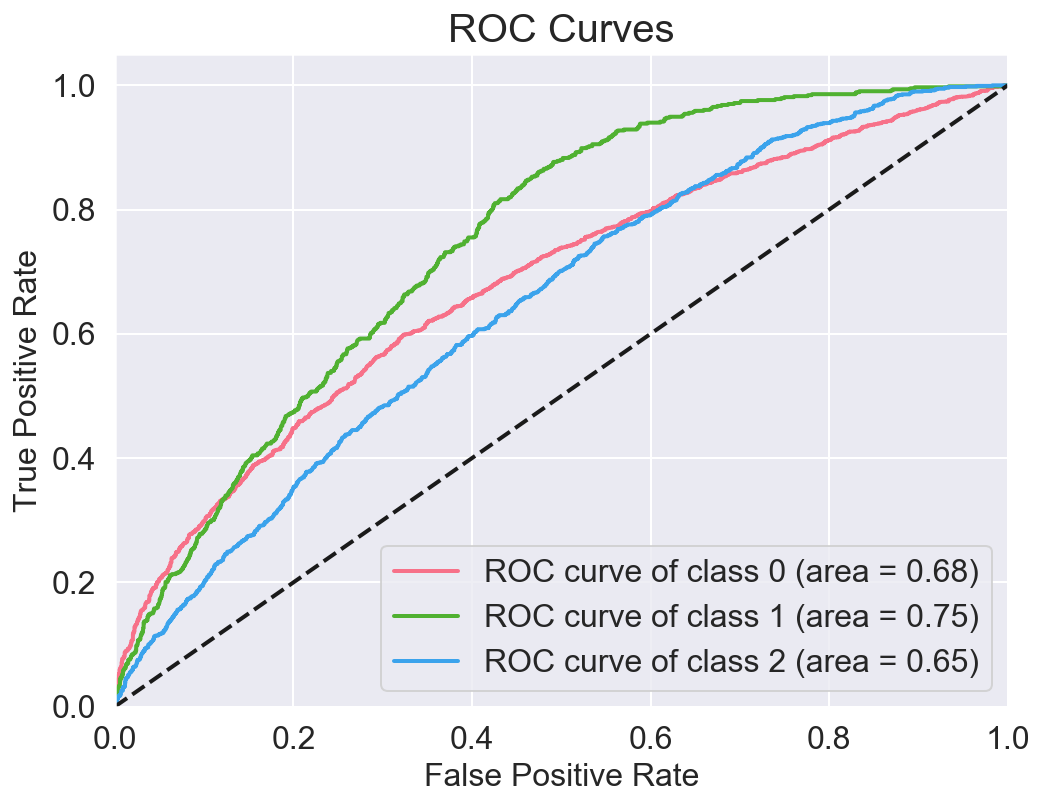

Area under ROC curve (ROC-AUC):
Class 0: 0.68
Class 1: 0.75
Class 2: 0.65


In [129]:
y_test_bin_16 = label_binarize(y_test, nnet_lbfgs.classes_)

skplt.metrics.plot_roc(y_test, nnet_lbfgs.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(nnet_lbfgs.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(
        y_test_bin_16[:, i], nnet_lbfgs.predict_proba(X_test)[:, i]), 2))

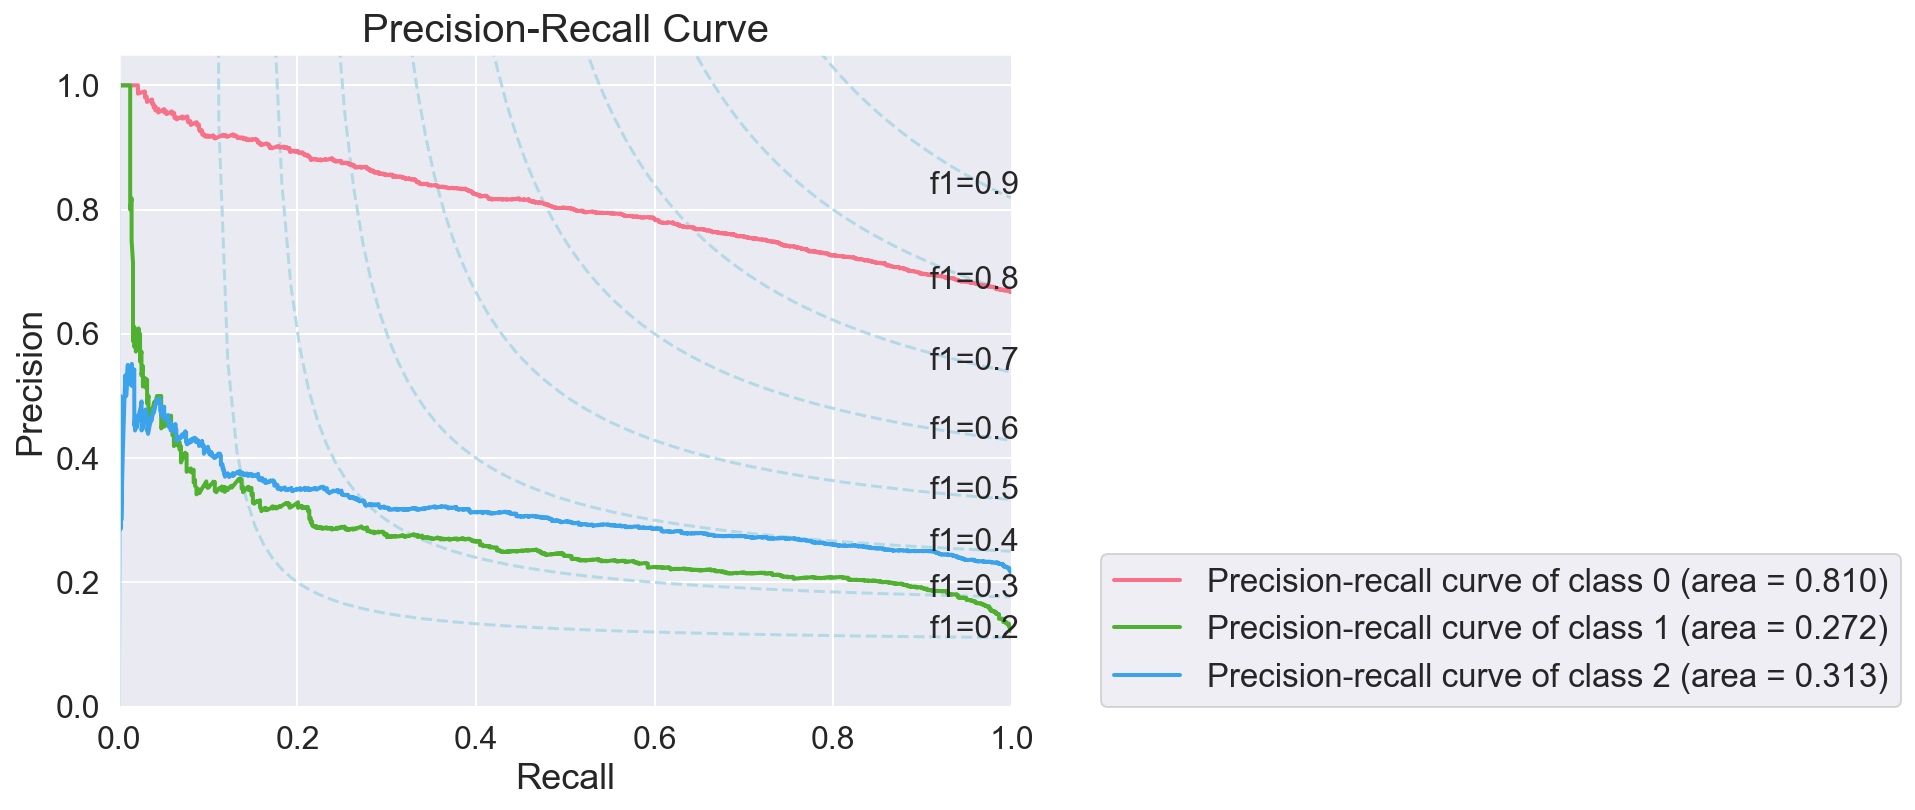

Area under precision-recall curve:
Class 0: 0.8104
Class 1: 0.272
Class 2: 0.3131


In [130]:
#Precision-Recall curve for Model 16
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, nnet_lbfgs.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

print('Area under precision-recall curve:')
for i, class_ in enumerate(nnet_lbfgs.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(
        y_test_bin_16[:, i], nnet_lbfgs.predict_proba(X_test)[:, i]), 4))

In [131]:
#Model 17 - Neural Net Adam
nnet_adam = MLPClassifier(solver='adam',
                    alpha=10**(0),
                    hidden_layer_sizes=(10, 10, 10, 10, 10),
                    activation='relu',
                    random_state=42,
                    batch_size=50,
                    max_iter=500)

nnet_adam.fit(X_train, y_train)

train_predictions_nnet_adam = nnet_adam.predict(X_train)
test_predictions_nnet_adam = nnet_adam.predict(X_test)
probabilities_nnet_adam = nnet_adam.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_nnet_adam, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_nnet_adam, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_nnet_adam, average='micro'))

print('Training score', nnet_adam.score(X_train, y_train))
print('Testing score', nnet_adam.score(X_test, y_test))

Precision score 0.6664104534973098
Recall score 0.6664104534973098
F1 score 0.6664104534973098
Training score 0.6663143227790324
Testing score 0.6664104534973098


In [132]:
cv_scores = cross_val_score(nnet_adam, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

CV scores [0.66634638 0.66634638 0.66634638 0.66626622 0.66626622]
Mean CV Score 0.6663143181569219


In [133]:
np.unique(test_predictions_nnet_adam)

array([0])

In [134]:
print(confusion_matrix(y_test, test_predictions_nnet_adam, labels=[0, 1, 2]))

[[3468    0    0]
 [ 633    0    0]
 [1103    0    0]]


In [135]:
print(classification_report(y_train, train_predictions_nnet_adam, digits=4))

              precision    recall  f1-score   support

           0     0.6663    1.0000    0.7997     13868
           1     0.0000    0.0000    0.0000      2532
           2     0.0000    0.0000    0.0000      4413

    accuracy                         0.6663     20813
   macro avg     0.2221    0.3333    0.2666     20813
weighted avg     0.4440    0.6663    0.5329     20813



In [137]:
print(classification_report(y_test, test_predictions_nnet_adam, digits=4))

              precision    recall  f1-score   support

           0     0.6664    1.0000    0.7998      3468
           1     0.0000    0.0000    0.0000       633
           2     0.0000    0.0000    0.0000      1103

    accuracy                         0.6664      5204
   macro avg     0.2221    0.3333    0.2666      5204
weighted avg     0.4441    0.6664    0.5330      5204



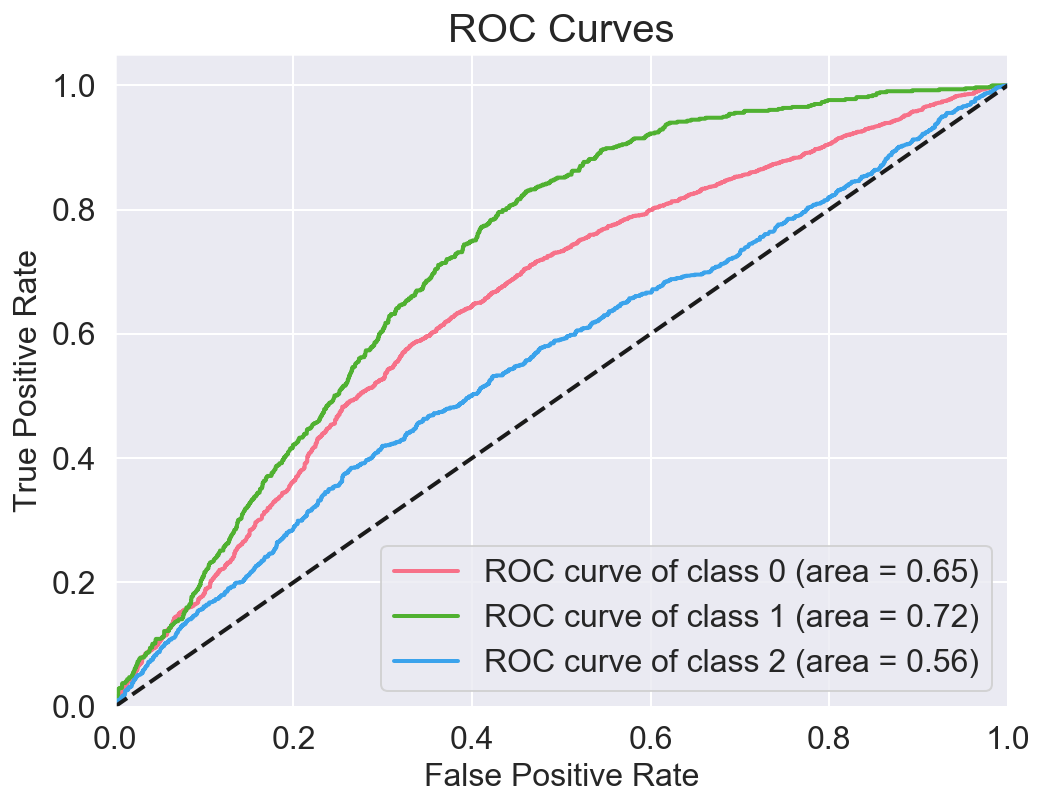

Area under ROC curve (ROC-AUC):
Class 0: 0.65
Class 1: 0.72
Class 2: 0.56


In [138]:
y_test_bin_17 = label_binarize(y_test, nnet_adam.classes_)

skplt.metrics.plot_roc(y_test, nnet_adam.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(nnet_adam.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(
        y_test_bin_17[:, i], nnet_adam.predict_proba(X_test)[:, i]), 2))

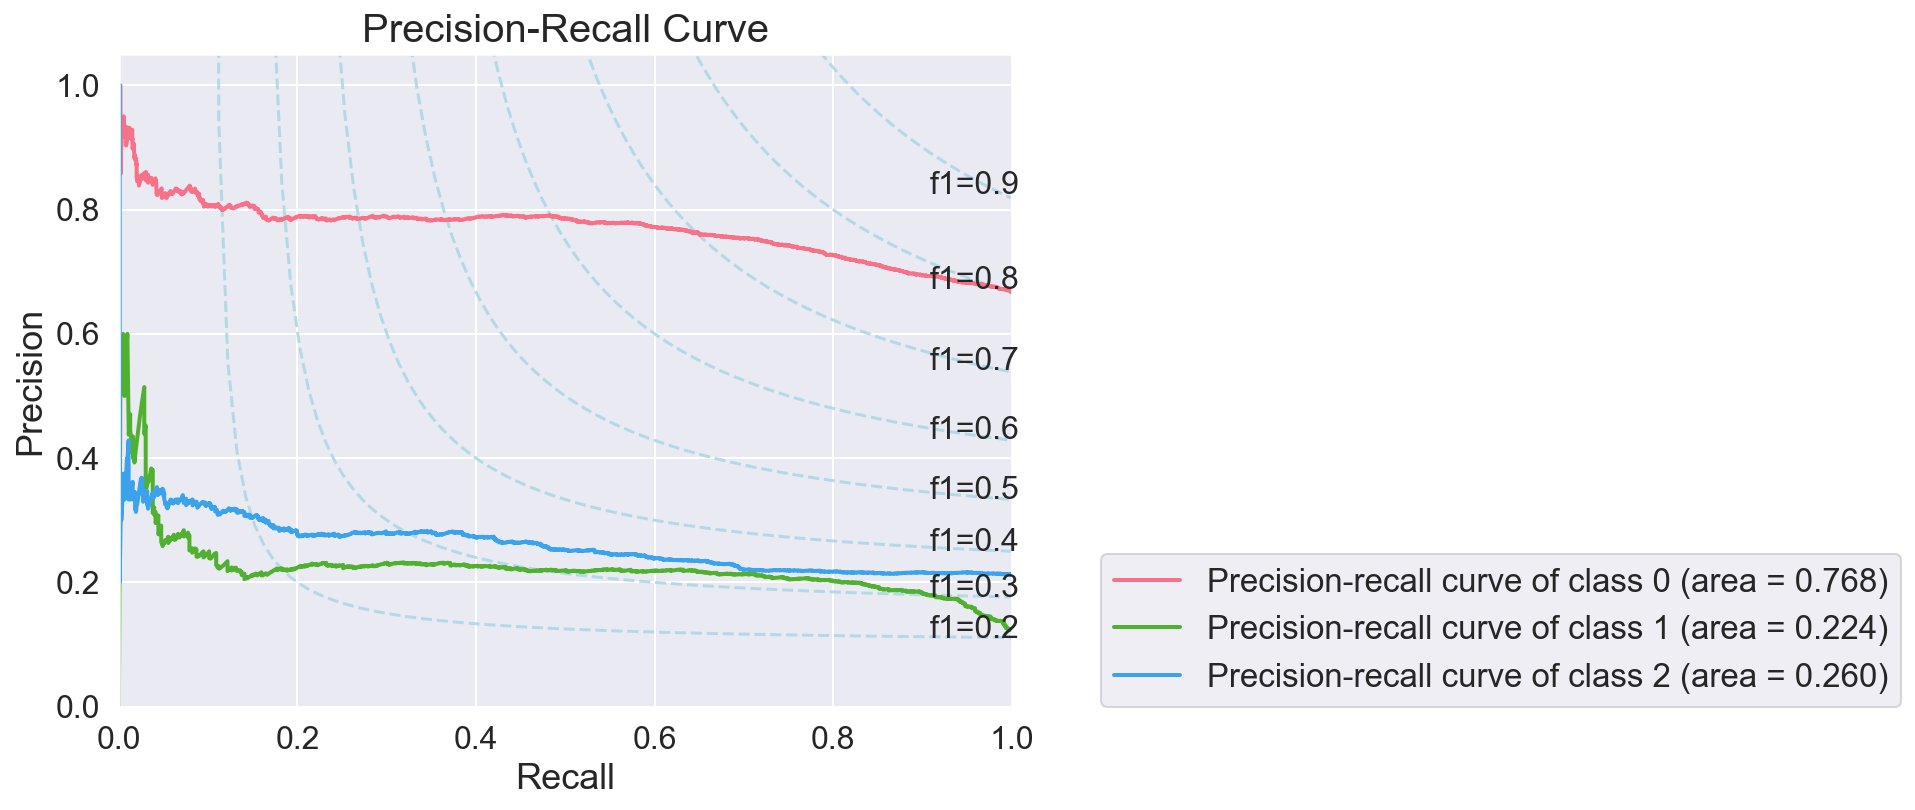

Area under precision-recall curve:
Class 0: 0.7684
Class 1: 0.224
Class 2: 0.2601


In [139]:
#Precision-Recall curve for Model 17
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, nnet_adam.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

print('Area under precision-recall curve:')
for i, class_ in enumerate(nnet_adam.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(
        y_test_bin_17[:, i], nnet_adam.predict_proba(X_test)[:, i]), 4))

In [140]:
#Model 18 - Neural Net sgd
nnet_sgd = MLPClassifier(solver='sgd',
                    alpha=10**(0),
                    hidden_layer_sizes=(10, 10, 10, 10, 10),
                    activation='relu',
                    random_state=42,
                    batch_size=50,
                    max_iter=500)

nnet_sgd.fit(X_train, y_train)

train_predictions_nnet_sgd = nnet_sgd.predict(X_train)
test_predictions_nnet_sgd = nnet_sgd.predict(X_test)
probabilities_nnet_sgd = nnet_sgd.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_nnet_sgd, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_nnet_sgd, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_nnet_sgd, average='micro'))

print('Training score', nnet_sgd.score(X_train, y_train))
print('Testing score', nnet_sgd.score(X_test, y_test))

cv_scores = cross_val_score(nnet_sgd, X_train, y_train, cv=5, n_jobs=2)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))

Precision score 0.6664104534973098
Recall score 0.6664104534973098
F1 score 0.6664104534973098
Training score 0.6663143227790324
Testing score 0.6664104534973098
CV scores [0.66634638 0.66634638 0.66634638 0.66626622 0.66626622]
Mean CV Score 0.6663143181569219
